In [33]:
print("""CONTEXT: The consumption of wine these days is becoming more common in social gatherings and to monitor the health
of individuals it's very important to maintain the quality of the wine. For the assessment of wine quality many methods
have been proposed. I have taken wine dataset comprising Red and White wines samples. 

The question that I am trying to answer is to build a classifier to correctly classify the wine on a scale of 1 to 10 
(1 - lowest quality and 10 - highest quality) basis the Physical characteristics and the Chemical composition of the wine, 
leveraging different supervised machine learning classification algorithms. 

- This is a multi-class classification problem.
      
OBJECTIVE: 
1. Classsify the Wine Samples of White and Red wine on a scale of 1 to 10 and achieving a accuracy of over ~ 65%
2. Recall of over 70% for class 5 and class 6
3. Identify the features that influence the quality of wine the most

DATA SOURCE: https://www.kaggle.com/datasets/mihaltursukov/wine-quality/dataLinks to an external site.

Data Source: Kaggle
1. 6497 wine data points
2. 11 features/physical characteristics: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']
3. Output variable: “Quality” (1 through 10)

Following are the Supervised Machine Learning algorithms that will be used to categorize the Wine quality and select the best 
basis the accuracy, Recall and interpretability:

1. Logistics Regression 2. KNN 3. Decision Trees 4. Support Vector Machines 5. Random Forest 6. Gradient Boosting (XGBoost) 7. Neural Networks
      
SUCCESS METRICS:
1. Accuracy score of Wine classification: Accuracy > 65%, Recall, Precision > 65%
2. Highest Recall for Class 5 and 6 (over 70% for class 5 and class 6)
3. Optimizing the F1 Score (Precision-Recall Tradeoff)
4. Clear communication of the features that influence the Quality of Wine the most

The steps include Data Cleaning, Exploratory Data Analysis (EDA), Feature Engineering, Model Building and Hyperparameter Tuning,
Model Testing and Selection, Summary of Key Findings
      
FIRST STEP : DATA CLEANING AND EXPLORATORY DATA ANALYSIS (EDA)""")


CONTEXT: The consumption of wine these days is becoming more common in social gatherings and to monitor the health
of individuals it's very important to maintain the quality of the wine. For the assessment of wine quality many methods
have been proposed. I have taken wine dataset comprising Red and White wines samples. 

The question that I am trying to answer is to build a classifier to correctly classify the wine on a scale of 1 to 10 
(1 - lowest quality and 10 - highest quality) basis the Physical characteristics and the Chemical composition of the wine, 
leveraging different supervised machine learning classification algorithms. 

- This is a multi-class classification problem.
      
OBJECTIVE: 
1. Classsify the Wine Samples of White and Red wine on a scale of 1 to 10 and achieving a accuracy of over ~ 65%
2. Recall of over 70% for class 5 and class 6
3. Identify the features that influence the quality of wine the most

DATA SOURCE: https://www.kaggle.com/datasets/mihaltursukov/w

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [35]:
# importing Red and White wine datasets
w_wine = pd.read_csv("/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/winequality-white.csv", sep=";")
r_wine = pd.read_csv("/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/winequality-red.csv", sep=";")

In [36]:
w_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
r_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
w_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [39]:
r_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
# Color column to distinguish between red and white wines
w_wine['color'] = "0"
r_wine['color'] = "1"

In [41]:
# combine the White and Red wine datasets
wine = pd.concat([w_wine, r_wine], ignore_index=True)

In [42]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [44]:
wine.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free sulfur dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


In [45]:
# Proportion Red and White wine in the dataset
white_quality_proportion = wine[wine['color'] == '0']['quality'].value_counts(normalize=True)
print(f"White Wine Quality Proportion:\n{white_quality_proportion.round(3)}\n")


red_quality_proportion = wine[wine['color'] == '1']['quality'].value_counts(normalize=True)
print(f"Red Wine Quality Proportion:\n{red_quality_proportion.round(3)}\n")



White Wine Quality Proportion:
quality
6    0.449
5    0.297
7    0.180
8    0.036
4    0.033
3    0.004
9    0.001
Name: proportion, dtype: float64

Red Wine Quality Proportion:
quality
5    0.426
6    0.399
7    0.124
4    0.033
8    0.011
3    0.006
Name: proportion, dtype: float64



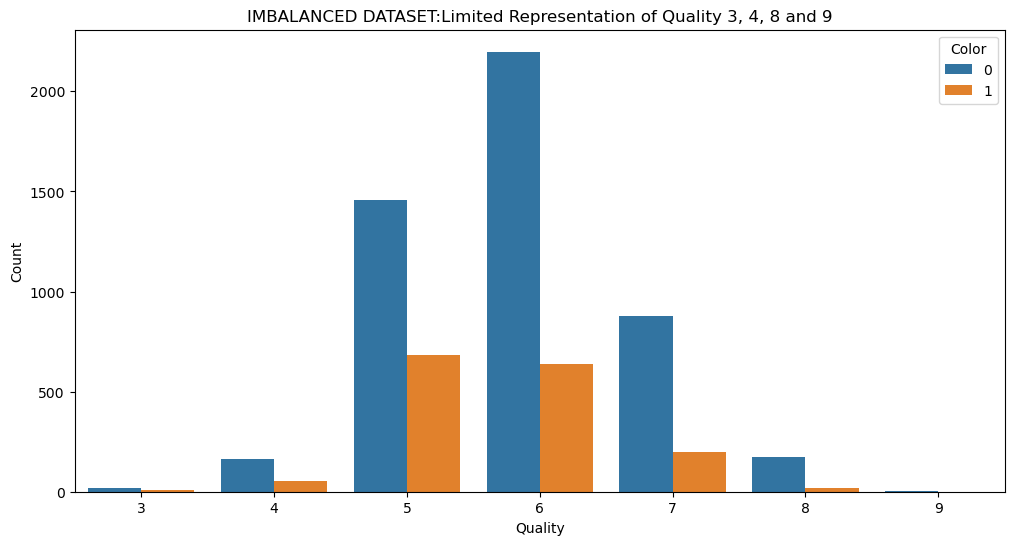

In [46]:
# Countplot of Quality for red and White wines
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', hue='color', data=wine)
plt.title('IMBALANCED DATASET:Limited Representation of Quality 3, 4, 8 and 9')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Color', loc='upper right')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/quality_countplot.png')
plt.show()


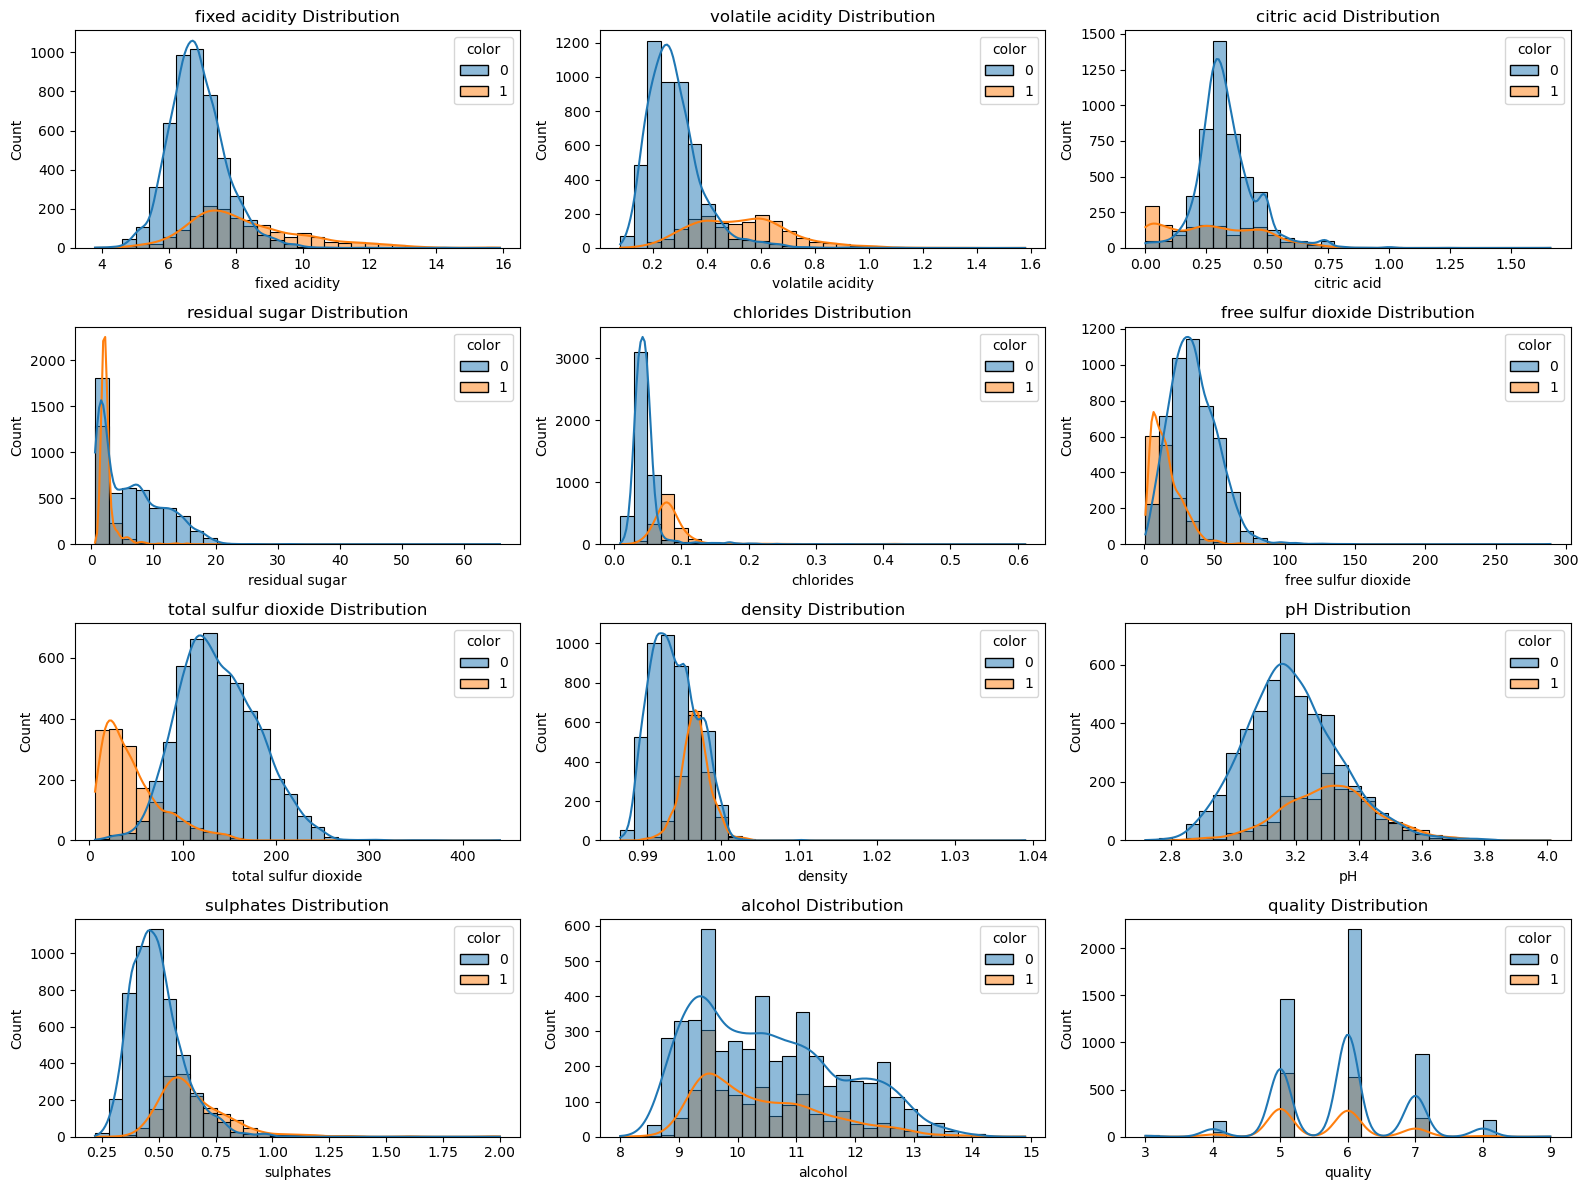

In [47]:
# Histograms with KDE for all numeric features
numeric_cols = wine.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
	plt.subplot(4, 3, i)
	sns.histplot(data=wine, x=col, kde=True, bins=30, hue="color")
	plt.title(f'{col} Distribution')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/numeric_feature_distributions.png')
plt.show()

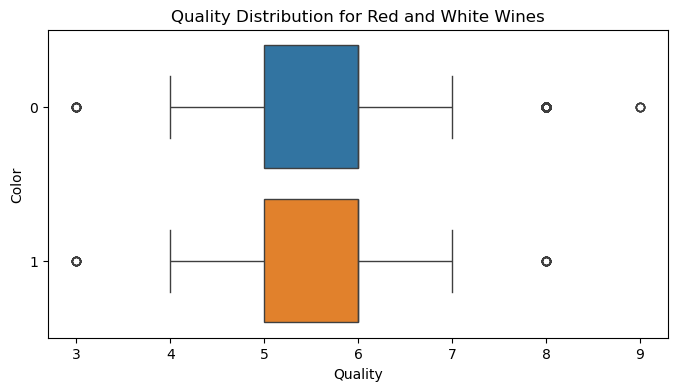

In [48]:
# FINDINGS:
# The boxplot shows the distribution of wine quality for red and white wines.
# Quality 3, 8 and 9 have very few samples and can be considered as outliers. 

plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='color', hue='color', data=wine)
plt.title('Quality Distribution for Red and White Wines')
plt.xlabel('Quality')
plt.ylabel('Color')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/quality_boxplot.png')
plt.show()

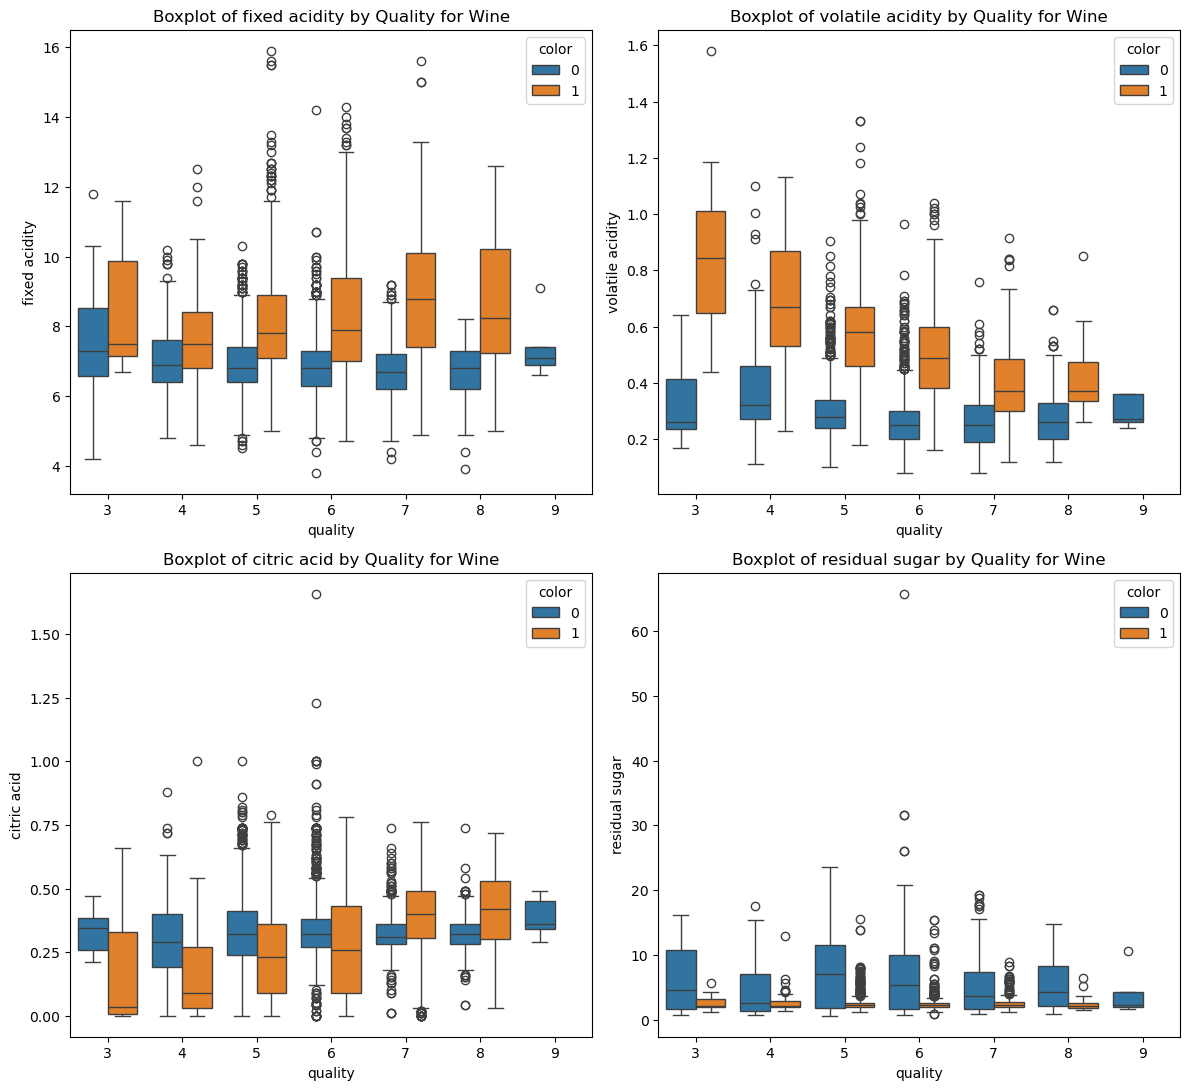

In [49]:
# FINDINGS:
# The boxplot shows the distribution of various features for red and white wines across different quality ratings.
# It appears that certain features like volatile acidity have a more pronounced effect on wine quality especially RED Wines.
# Residual Sugar does not seem to have much effect on the quality of wine.
# Seems like there are a lot of outliers in the dataset as seen in the boxplots.

# Boxplot for the quality of wine using seaborn
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
plt.figure(figsize=(12, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='quality', y=feature, hue='color', data=wine)
    plt.title(f'Boxplot of {feature} by Quality for Wine')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/quality_feature_boxplot_1.png')
plt.show()


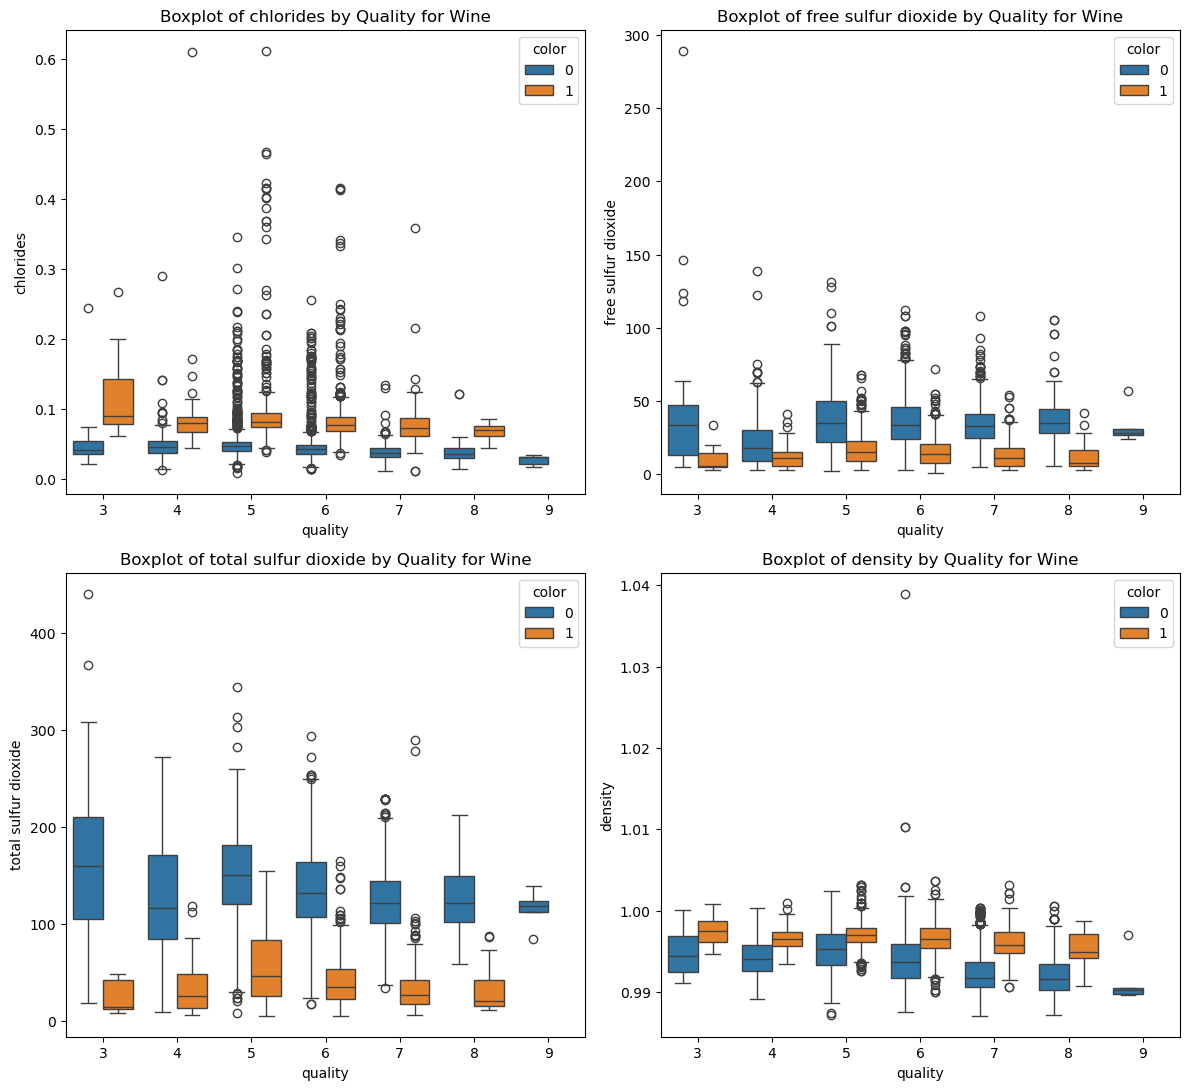

In [50]:
# Boxplot for the quality of wine using seaborn
features = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
plt.figure(figsize=(12, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='quality', y=feature, hue='color', data=wine)
    plt.title(f'Boxplot of {feature} by Quality for Wine')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/quality_feature_boxplot_2.png')
plt.show()


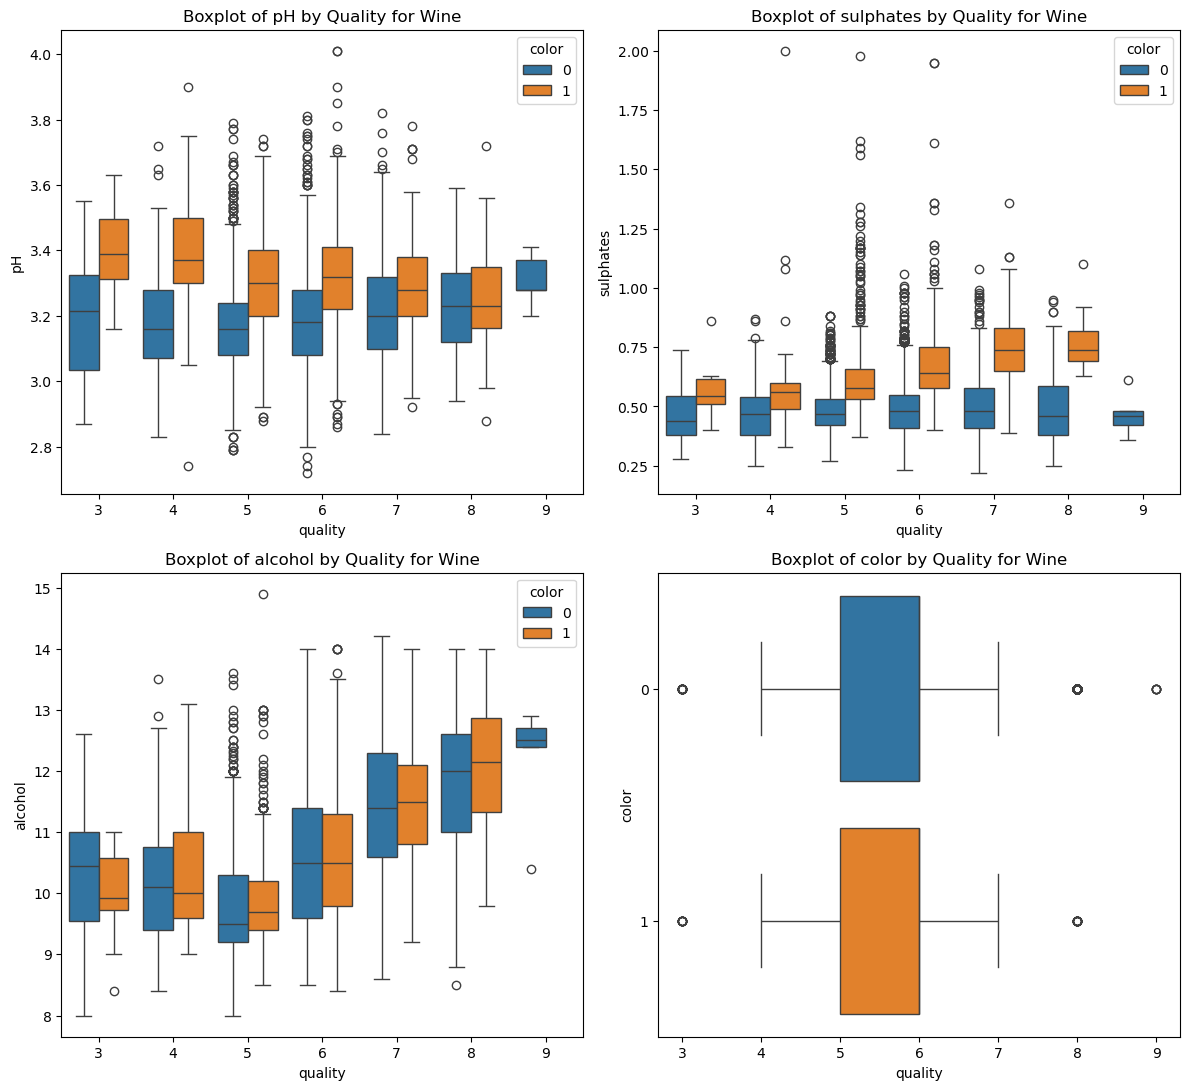

In [51]:
# Boxplot for the quality of wine using seaborn
features = ['pH', 'sulphates', 'alcohol', 'color']
plt.figure(figsize=(12, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='quality', y=feature, hue='color', data=wine)
    plt.title(f'Boxplot of {feature} by Quality for Wine')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/quality_feature_boxplot_3.png')
plt.show()


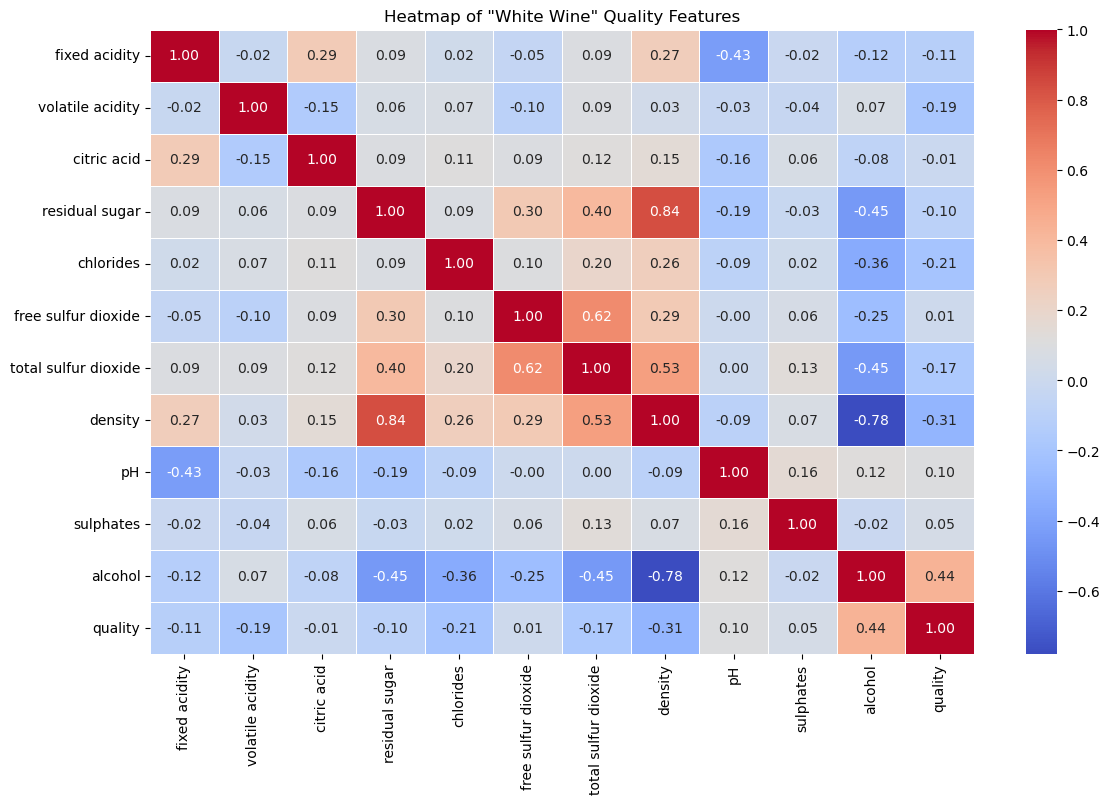

In [52]:
# FINDINGS: WHITE WINES
# The heatmap shows the correlation between different features for white wine.
# It appears that certain features like Alcohol has a strong positive correlation with wine quality.
# Alcohol and density seems to have a negative multicollinearity.
# Total Sulfur Dioxide and Free Sulfur Dioxide also seems to have a positive multicollinearity.

# Heatmap of White Wine features

plt.figure(figsize=(12, 8))
sns.heatmap(w_wine.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.title('Heatmap of "White Wine" Quality Features')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/white_wine_heatmap.png')
plt.show();

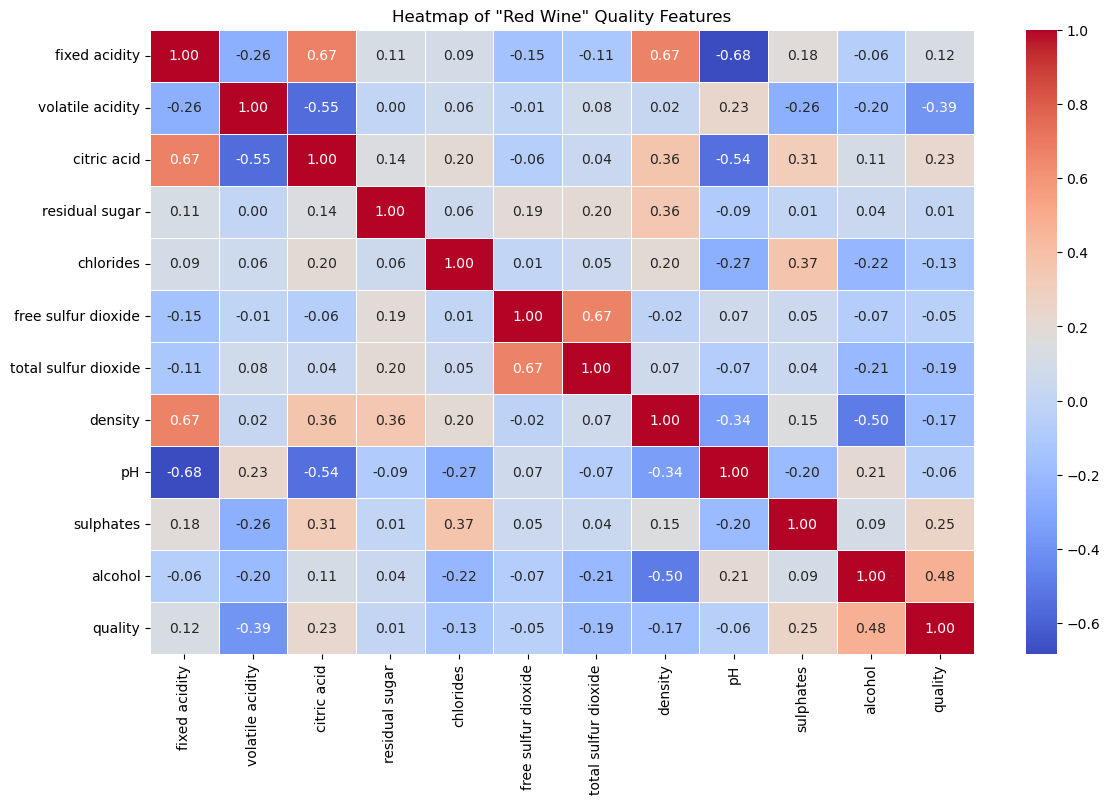

In [53]:
# FINDINGS: RED WINES
# The heatmap shows the correlation between different features for RED wine.
# It appears that certain features like Alcohol has a strong positive correlation with RED wine quality.
# Alcohol and density seems to have a negative multicollinearity.
# Total Sulfur Dioxide and Free Sulfur Dioxide also seems to have a positive multicollinearity.

# Heatmap of RED Wine features

plt.figure(figsize=(12, 8))
sns.heatmap(r_wine.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.title('Heatmap of "Red Wine" Quality Features')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/red_wine_heatmap.png')
plt.show();

In [54]:
# create a DataFrame with mean values of each feature grouped by quality and color and plot the results
mean_features = wine.groupby(['quality', 'color']).mean().reset_index().round(2)
mean_features.head(14)


,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,0,7.60,0.33,0.34,6.39,0.05,53.32,170.60,0.99,3.19,0.47,10.34
1,3,1,8.36,0.88,0.17,2.64,0.12,11.00,24.90,1.00,3.40,0.57,9.96
2,4,0,7.13,0.38,0.30,4.63,0.05,23.36,125.28,0.99,3.18,0.48,10.15
3,4,1,7.78,0.69,0.17,2.69,0.09,12.26,36.25,1.00,3.38,0.60,10.27
4,5,0,6.93,0.30,0.34,7.33,0.05,36.43,150.90,1.00,3.17,0.48,9.81
5,5,1,8.17,0.58,0.24,2.53,0.09,16.98,56.51,1.00,3.30,0.62,9.90
6,6,0,6.84,0.26,0.34,6.44,0.05,35.65,137.05,0.99,3.19,0.49,10.58
7,6,1,8.35,0.50,0.27,2.48,0.08,15.71,40.87,1.00,3.32,0.68,10.63
8,7,0,6.73,0.26,0.33,5.19,0.04,34.13,125.11,0.99,3.21,0.50,11.37
9,7,1,8.87,0.40,0.38,2.72,0.08,14.05,35.02,1.00,3.29,0.74,11.47


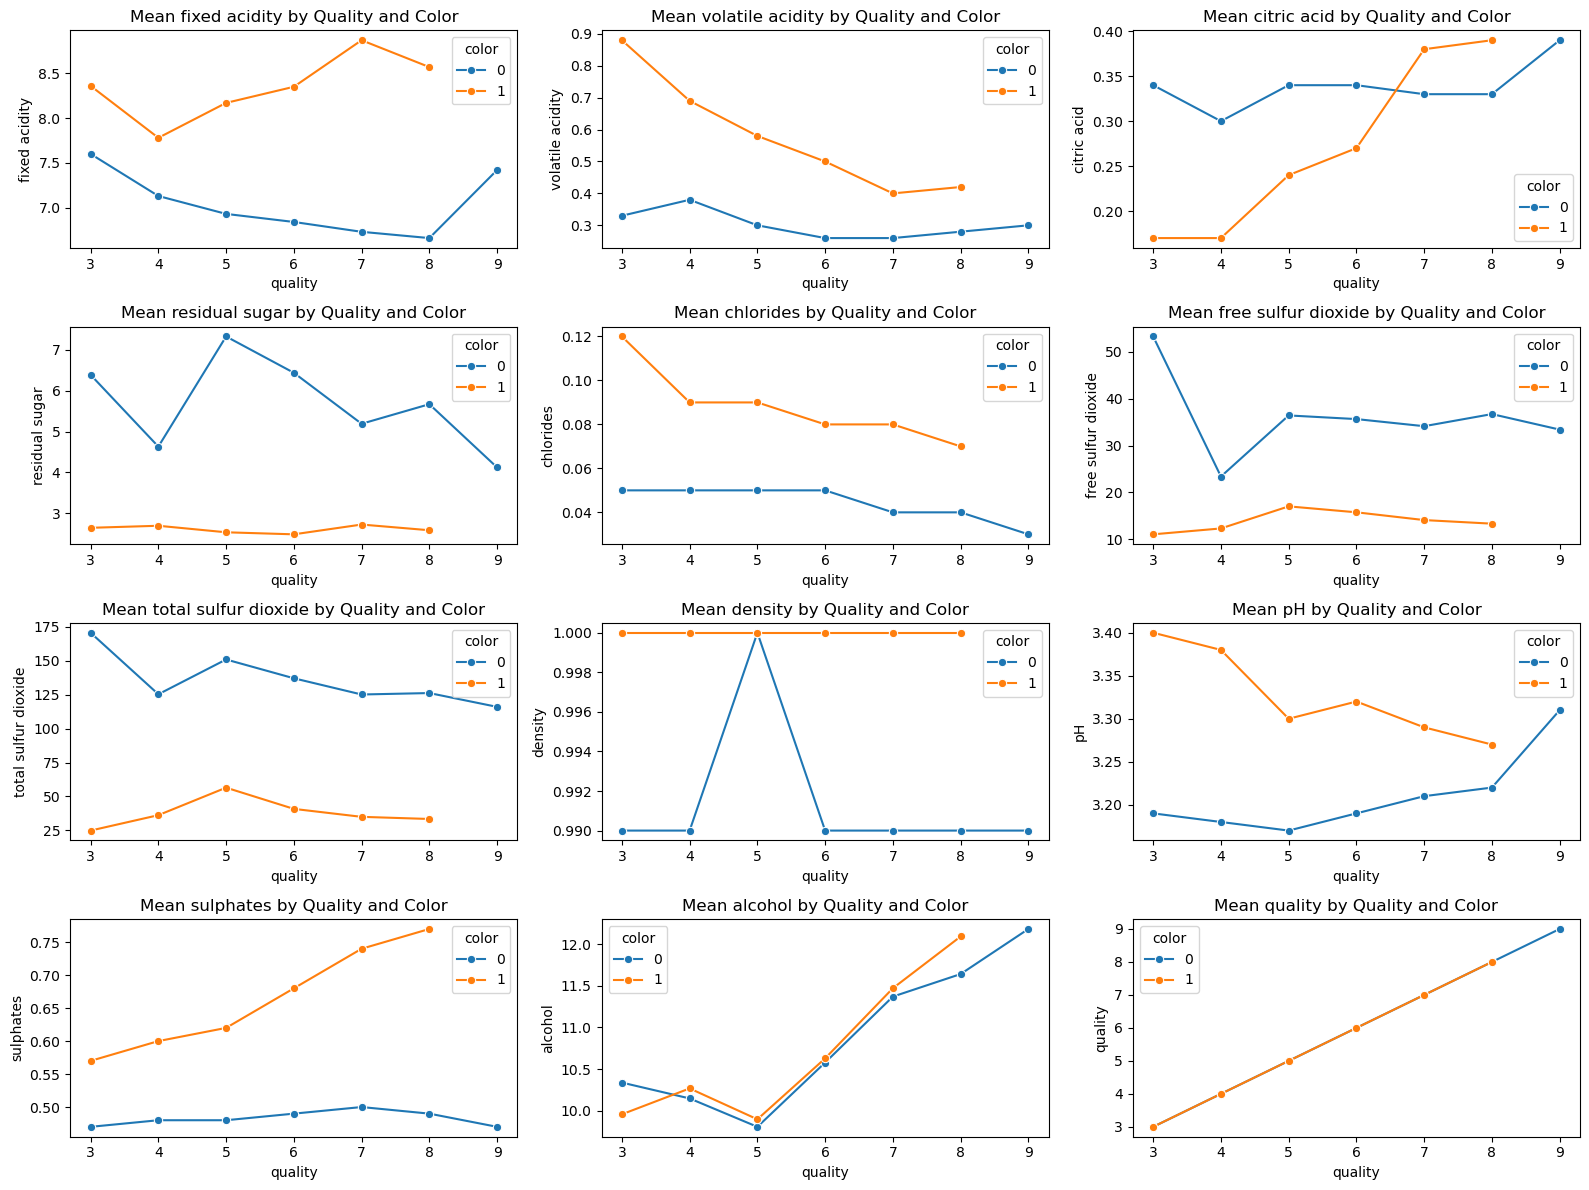

In [55]:
# FINDINGS:
# Quality of Wine improves as the Volatile acidity decreases for RED wine.
# Quality of wine improves as the Citric acid increases for RED wine.
# Alcohol content seems to have a strong correlation with the quality of wine for both RED and WHITE wines.
# Sulphates also seems to have a positive correlation with the quality of wine for RED Wines
# Quality of RED wine seems to go up with decrease in pH but vice versa for White Wine
# Chrolides seems to have a negative correlation with the quality of wine for both RED and WHITE wines
# Total Sulfur dioxide and Free Sulfur dioxide seems folows similar trend with Quality but not very significant correlation

# Chemical composition mean values by Quality and Color
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.lineplot(x='quality', y=col, hue='color', data=mean_features, marker='o')
    plt.title(f'Mean {col} by Quality and Color')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/mean_features_by_quality_color.png')
plt.show()

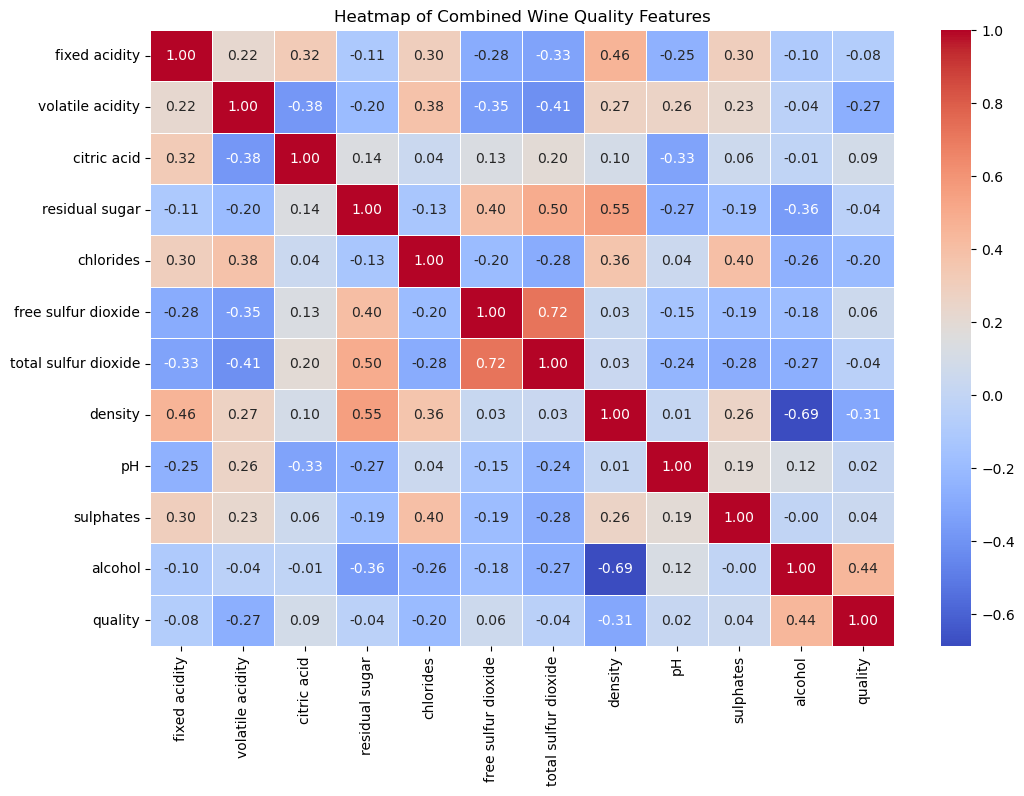

In [56]:
# FINDINGS: RED AND WHITE WINE COMBINED
# The heatmap shows the correlation between different features wine.
# It appears that certain features like Alcohol has a strong positive correlation with wine quality.
# Alcohol and density seems to have a negative multicollinearity issue.
# Total Sulfur Dioxide and Free Sulfur Dioxide also seems to have a positive multicollinearity issue.

# Correlation Heatmap for the "combined" Wine dataset
plt.figure(figsize=(12, 8))
sns.heatmap(wine.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Combined Wine Quality Features')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/combined_wine_heatmap.png')
plt.show();

p-Values less than 0.05 indicate a statistically significant correlation between the feature and wine quality.
p-Values for Combined Wine
                     p-value
fixed acidity            0.0
volatile acidity         0.0
citric acid              0.0
chlorides                0.0
free sulfur dioxide      0.0
density                  0.0
alcohol                  0.0
total sulfur dioxide   0.001
sulphates              0.002
residual sugar         0.003
pH                     0.116


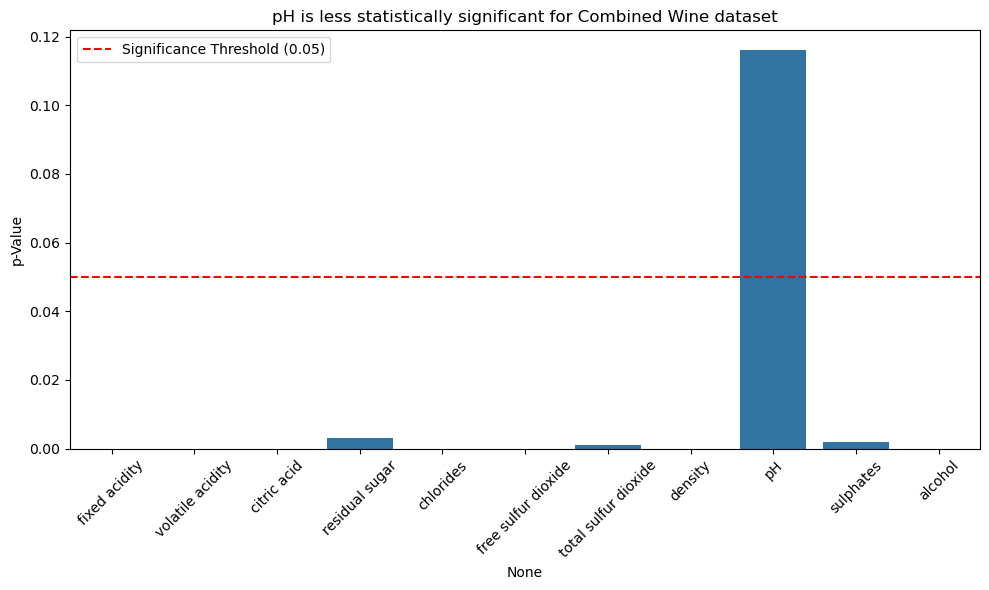

In [57]:
# Calculate the p-values for red wine features
from scipy.stats import pearsonr
p_values_combined = pd.DataFrame(index=numeric_cols, columns=['p-value'])
for col in numeric_cols:
    if col != 'quality':
        corr, p_val = pearsonr(wine[col], wine['quality'])
        p_values_combined.loc[col, 'p-value'] = round(p_val, 3)
p_values_combined = p_values_combined.dropna()
p_values_combined.sort_values(by='p-value')

print("p-Values less than 0.05 indicate a statistically significant correlation between the feature and wine quality.")

print(f"p-Values for Combined Wine\n{p_values_combined.sort_values(by='p-value')}")

# plot the p-values for combined wine features
plt.figure(figsize=(10, 6))
sns.barplot(x=p_values_combined.index, y='p-value', data=p_values_combined)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('pH is less statistically significant for Combined Wine dataset')
plt.ylabel('p-Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/p_values_combined_wine.png')
plt.show()

p-Values less than 0.05 indicate a statistically significant correlation between the feature and wine quality.


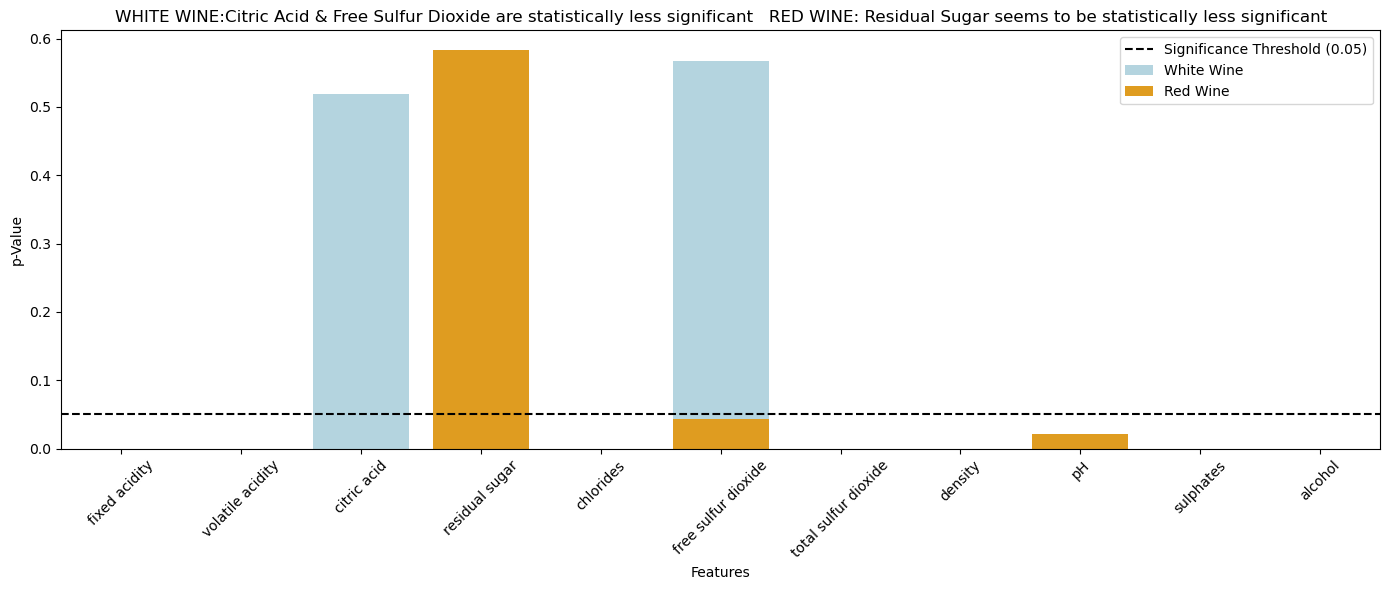

In [58]:
# p-Values for White wine features
p_values_white = pd.DataFrame(index=numeric_cols, columns=['p-value'])
for col in numeric_cols:
    if col != 'quality':
        corr, p_val = pearsonr(w_wine[col], w_wine['quality'])
        p_values_white.loc[col, 'p-value'] = round(p_val, 3)
p_values_white = p_values_white.dropna()
p_values_white.sort_values(by='p-value')

# p-Values for Red wine features
p_values_red = pd.DataFrame(index=numeric_cols, columns=['p-value'])
for col in numeric_cols:
    if col != 'quality':
        corr, p_val = pearsonr(r_wine[col], r_wine['quality'])
        p_values_red.loc[col, 'p-value'] = round(p_val, 3)
p_values_red = p_values_red.dropna()
p_values_red.sort_values(by='p-value')

print("p-Values less than 0.05 indicate a statistically significant correlation between the feature and wine quality.")


# plot the p-values for white wine and Red wine features in the same plot

plt.figure(figsize=(14, 6))
sns.barplot(x=p_values_white.index, y='p-value', data=p_values_white, color='lightblue', label='White Wine')
sns.barplot(x=p_values_red.index, y='p-value', data=p_values_red, color='orange', label='Red Wine')
plt.axhline(0.05, color='black', linestyle='--', label='Significance Threshold (0.05)')
plt.title('WHITE WINE:Citric Acid & Free Sulfur Dioxide are statistically less significant   RED WINE: Residual Sugar seems to be statistically less significant')
plt.ylabel('p-Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/p_values_red_white_wine.png')
plt.show()

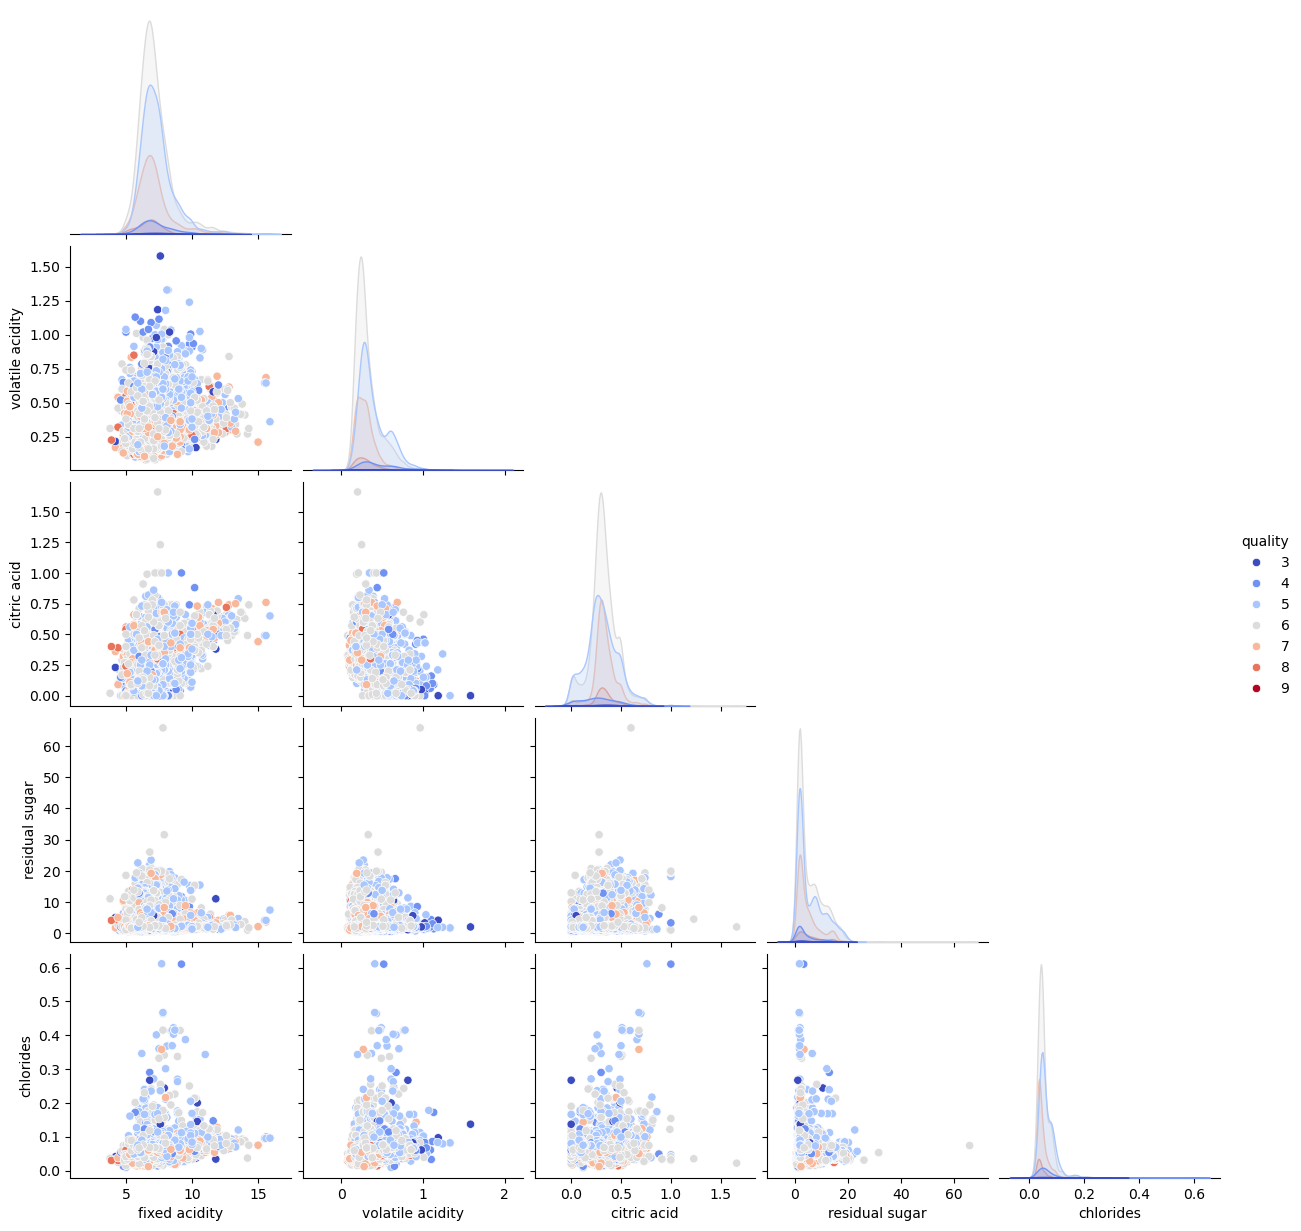

In [59]:
# Pair plot for Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar and Chlorides
sns.pairplot(wine, hue='quality', vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'], corner=True, palette='coolwarm')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/pairplot_selected_features_1.png')
plt.show();

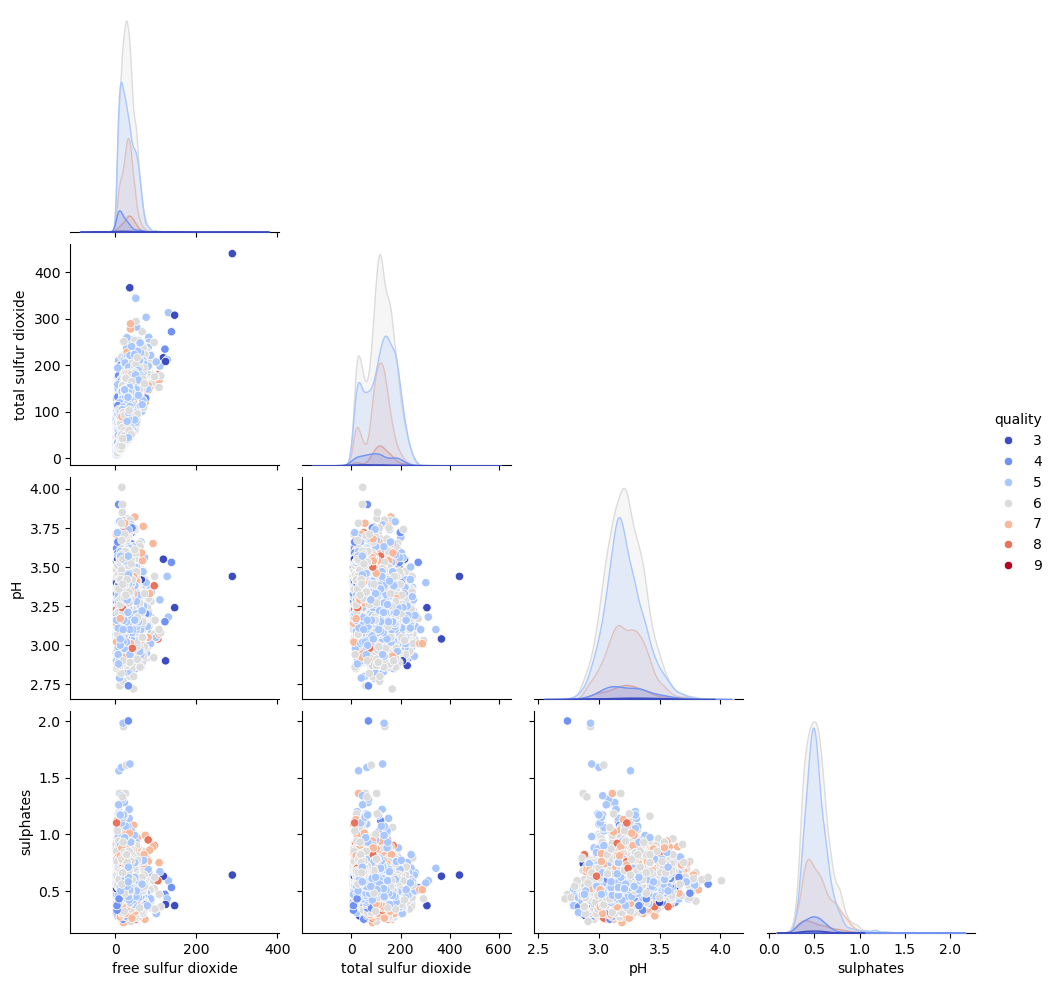

In [60]:
# Pair plot for Free Sulfur Dioxide, Total Sulfur Dioxide, pH and Sulphates
sns.pairplot(wine, hue='quality', vars=['free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates'], corner=True, palette='coolwarm')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/pairplot_selected_features_2.png')
plt.show();

In [61]:
print("""EDA SUMMARY:
      1. The dataset contains 6497 samples of red and white wines with 11 features and a target variable 'quality' ranging from 1 to 10.
      2. The features include physicochemical tests and sensory data.
      3. The dataset is imbalanced, with a very small number of samples for quality ratings 3, 4, 8 and 9.
      4. Correlation analysis shows strong relationships between some features and the target variable.
      5. Visualizations reveal patterns and distributions in the data.
      6. Further feature engineering and selection may improve model performance.""")

EDA SUMMARY:
      1. The dataset contains 6497 samples of red and white wines with 11 features and a target variable 'quality' ranging from 1 to 10.
      2. The features include physicochemical tests and sensory data.
      3. The dataset is imbalanced, with a very small number of samples for quality ratings 3, 4, 8 and 9.
      4. Correlation analysis shows strong relationships between some features and the target variable.
      5. Visualizations reveal patterns and distributions in the data.
      6. Further feature engineering and selection may improve model performance.


In [62]:
print("""FEATURE ENGINEERING AND FEATURE SELECTION""")

FEATURE ENGINEERING AND FEATURE SELECTION


In [63]:
print(""" FEATURE SELECTION AND MODEL BUILDING
""")
print("""Basis the EDA, there are a lot of features that do not show a strong linear correlation with the Quality of wine. 
      However basis the analysis and domain knowledge, I will be using all the features for model building and selection.
      1. All numerical Features excluding the "Density" feature as it has a strong multicollinearity with Alcohol.
      2. Only one of the Sulfur Dioxide features (Free or Total) will be used as they have a strong multicollinearity.
      3. Color feature will be one-hot encoded and is important for Quality ratings.
      4. Quality will be the target variable.""")

 FEATURE SELECTION AND MODEL BUILDING

Basis the EDA, there are a lot of features that do not show a strong linear correlation with the Quality of wine. 
      However basis the analysis and domain knowledge, I will be using all the features for model building and selection.
      1. All numerical Features excluding the "Density" feature as it has a strong multicollinearity with Alcohol.
      2. Only one of the Sulfur Dioxide features (Free or Total) will be used as they have a strong multicollinearity.
      3. Color feature will be one-hot encoded and is important for Quality ratings.
      4. Quality will be the target variable.


In [64]:
# Feature selection
X = wine.drop(columns=['quality', 'density', 'total sulfur dioxide'], axis=1)  # Dropping density due to multicollinearity with alcohol
y = wine['quality']

In [65]:
# Handling Imbalanced Dataset using SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Find the minimum class count
min_class_count = y.value_counts().min()
print(f"Minimum class count: {min_class_count}")

# Use 'auto' to balance all classes to the majority class
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X, y = smote.fit_resample(X, y)
print(f"Resampled training set shape: {X.shape}, {y.shape}")

# Check the distribution of classes in the resampled training set
print(f"Resampled class distribution:\n{y.value_counts()}")


Minimum class count: 5
Resampled training set shape: (19852, 10), (19852,)
Resampled class distribution:
quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64


In [66]:
# Preprocessing pipelines for both numeric and categorical data.

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'pH', 'sulphates',
                                  'alcohol']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['color'])])

In [67]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (15881, 10), (15881,)
Testing set shape: (3971, 10), (3971,)


In [68]:
print("""BUILDING BASELINE MODEL USING DUMMY CLASSIFIER """)

BUILDING BASELINE MODEL USING DUMMY CLASSIFIER 


In [69]:
from sklearn.dummy import DummyClassifier

dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])
dummy_model.fit(X_train, y_train)

dummy_train_score = dummy_model.score(X_train, y_train)
dummy_test_score = dummy_model.score(X_test, y_test)

# Accuracy Score
print(f"Dummy Training Accuracy: {dummy_train_score:.2f}")
print(f"Dummy Testing Accuracy: {dummy_test_score:.2f}")
# BASELINE ACCURACY : DUMMY CLASSIFIER


Dummy Training Accuracy: 0.14
Dummy Testing Accuracy: 0.14


In [70]:
print("""BULDING SIMPLE MODELS""")

BULDING SIMPLE MODELS


In [71]:
from sklearn.metrics import recall_score, precision_score, f1_score

# fit the Logistic Regression model
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, random_state=42))
])
logreg_model.fit(X_train, y_train)

logreg_train_score = logreg_model.score(X_train, y_train)
logreg_test_score = logreg_model.score(X_test, y_test)
# Accuracy Score
print(f"Logistic Regression Training Accuracy: {logreg_train_score:.2f}")
print(f"Logistic Regression Testing Accuracy: {logreg_test_score:.2f}")

Logistic Regression Training Accuracy: 0.56
Logistic Regression Testing Accuracy: 0.54


In [72]:
# fit a simple KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
knn_model.fit(X_train, y_train)

knn_train_score = knn_model.score(X_train, y_train)
knn_test_score = knn_model.score(X_test, y_test)

# Accuracy Score
print(f"KNN Training Accuracy: {knn_train_score:.2f}")
print(f"KNN Testing Accuracy: {knn_test_score:.2f}")

KNN Training Accuracy: 0.88
KNN Testing Accuracy: 0.81


In [73]:
# fit the simple Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt_model.fit(X_train, y_train)

dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

# Accuracy Score
print(f"Decision Tree Training Accuracy: {dt_train_score:.2f}")
print(f"Decision Tree Testing Accuracy: {dt_test_score:.2f}")


Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 0.82


In [74]:
# fit the simple Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train, y_train)

rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

# Accuracy Score
print(f"Random Forest Training Accuracy: {rf_train_score:.2f}")
print(f"Random Forest Testing Accuracy: {rf_test_score:.2f}")



Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.89


In [75]:
# fit the Gradient Boosting model
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable so classes start from 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='mlogloss', random_state=42))
])
xgb_model.fit(X_train, y_train_encoded)

xgb_train_score = xgb_model.score(X_train, y_train_encoded)
xgb_test_score = xgb_model.score(X_test, y_test_encoded)

# Accuracy Score
print(f"XGBoost Training Accuracy: {xgb_train_score:.2f}")
print(f"XGBoost Testing Accuracy: {xgb_test_score:.2f}")

XGBoost Training Accuracy: 0.99
XGBoost Testing Accuracy: 0.88



Model Comparison:

                     Train Accuracy  Test Accuracy  Test Precision  \
Model                                                                
Logistic Regression            0.56           0.54            0.53   
KNN                            0.88           0.81            0.80   
Decision Tree                  1.00           0.82            0.82   
Random Forest                  1.00           0.89            0.89   
XGBoost                        0.99           0.88            0.88   
ANN                            0.64           0.63            0.62   

                     Test Recall  Test F1 Score  
Model                                            
Logistic Regression         0.54           0.53  
KNN                         0.81           0.80  
Decision Tree               0.82           0.82  
Random Forest               0.89           0.89  
XGBoost                     0.88           0.88  
ANN                         0.64           0.62  


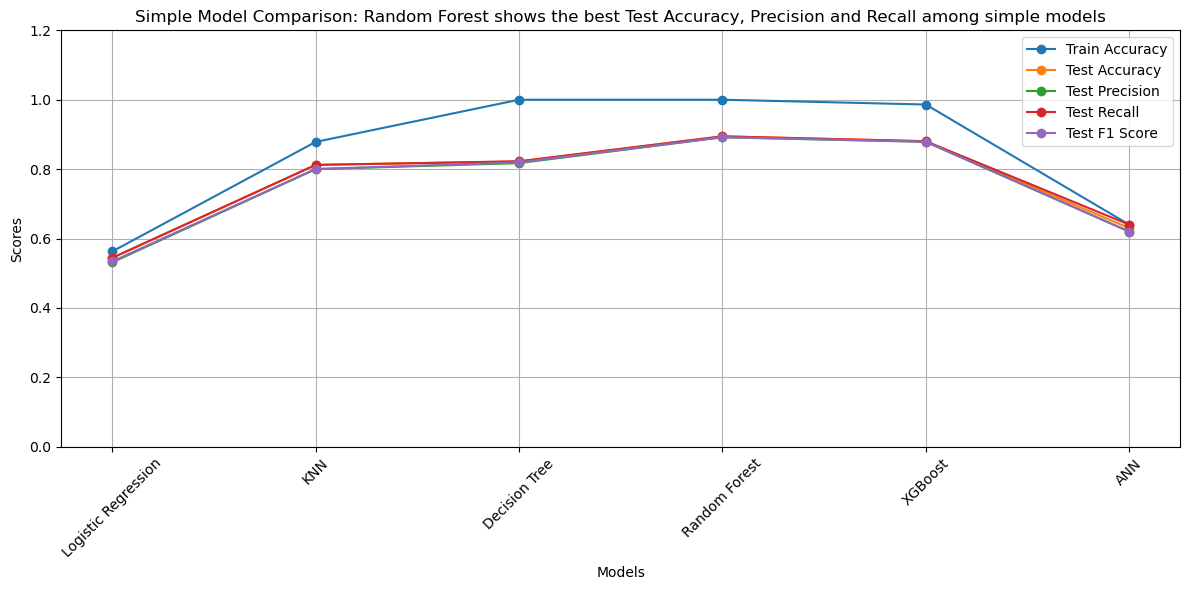

In [76]:
# comparing the Train and test accuracy scores, Test Precision and Test recall of all the models
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']
train_scores = [logreg_train_score, knn_train_score, dt_train_score, rf_train_score, xgb_train_score, 0.64]  # Placeholder for ANN
test_scores = [logreg_test_score, knn_test_score, dt_test_score, rf_test_score, xgb_test_score, 0.63]        # Placeholder for ANN
precisions = [precision_score(y_test, logreg_model.predict(X_test), average='weighted', zero_division=0), 
              precision_score(y_test, knn_model.predict(X_test), average='weighted', zero_division=0), 
              precision_score(y_test, dt_model.predict(X_test), average='weighted', zero_division=0), 
              precision_score(y_test, rf_model.predict(X_test), average='weighted', zero_division=0), 
              precision_score(y_test_encoded, xgb_model.predict(X_test), average='weighted', zero_division=0), 0.62]
recalls = [recall_score(y_test, logreg_model.predict(X_test), average='weighted', zero_division=0), 
           recall_score(y_test, knn_model.predict(X_test), average='weighted', zero_division=0), 
           recall_score(y_test, dt_model.predict(X_test), average='weighted', zero_division=0), 
           recall_score(y_test, rf_model.predict(X_test), average='weighted', zero_division=0), 
           recall_score(y_test_encoded, xgb_model.predict(X_test), average='weighted', zero_division=0), 0.64]
f1_scores = [f1_score(y_test, logreg_model.predict(X_test), average='weighted', zero_division=0), 
             f1_score(y_test, knn_model.predict(X_test), average='weighted', zero_division=0), 
             f1_score(y_test, dt_model.predict(X_test), average='weighted', zero_division=0), 
             f1_score(y_test, rf_model.predict(X_test), average='weighted', zero_division=0), 
             f1_score(y_test_encoded, xgb_model.predict(X_test), average='weighted', zero_division=0), 0.62]
results_df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_scores,
    'Test Accuracy': test_scores,
    'Test Precision': precisions,
    'Test Recall': recalls,
    'Test F1 Score': f1_scores
})
results_df = results_df.set_index('Model').round(2)
print("\nModel Comparison:\n")
print(results_df)

# plot the results as a line plot
plt.figure(figsize=(12, 6))
plt.plot(models, train_scores, marker='o', label='Train Accuracy')
plt.plot(models, test_scores, marker='o', label='Test Accuracy')
plt.plot(models, precisions, marker='o', label='Test Precision')
plt.plot(models, recalls, marker='o', label='Test Recall')
plt.plot(models, f1_scores, marker='o', label='Test F1 Score')
plt.title('Simple Model Comparison: Random Forest shows the best Test Accuracy, Precision and Recall among simple models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1.2)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/base_model_comparison.png')
plt.show()

In [77]:
print("""HYPERPARAMETER TUNING for 
      1. Decision Tree, 
      2. Random Forest and 
      3. XGBoost Models
      4. Artificial Neural Networks (ANN)""")

HYPERPARAMETER TUNING for 
      1. Decision Tree, 
      2. Random Forest and 
      3. XGBoost Models
      4. Artificial Neural Networks (ANN)


In [79]:
# hyperparameter tuning for decision Tree model using GridSearchCV
dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 8],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=3, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print(f"Best parameters from GridSearchCV: {dt_grid_search.best_params_}")
best_dt_model = dt_grid_search.best_estimator_
best_dt_train_score = best_dt_model.score(X_train, y_train)
best_dt_test_score = best_dt_model.score(X_test, y_test)

# Accuracy Score
print(f"Best Decision Tree Training Accuracy: {best_dt_train_score:.2f}")
print(f"Best Decision Tree Testing Accuracy: {best_dt_test_score:.2f}")

# Test recall
print(f"Decision Tree Grid Search Testing Recall: {recall_score(y_test, best_dt_model.predict(X_test), average='macro'):.2f}")

# Test precision
print(f"Decision Tree Grid Search Testing Precision: {precision_score(y_test, best_dt_model.predict(X_test), average='macro'):.2f}")

# print cross validation scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=3)
print(f"Decision Tree Grid Search CV Mean Score: {cv_scores.mean():.2f}")

Best parameters from GridSearchCV: {'classifier__criterion': 'gini', 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Decision Tree Training Accuracy: 1.00
Best Decision Tree Testing Accuracy: 0.82
Decision Tree Grid Search Testing Recall: 0.82
Decision Tree Grid Search Testing Precision: 0.81
Decision Tree Grid Search CV Mean Score: 0.79


In [80]:
# Hyperparameter tuning for Random Forest model using GridSearchCV
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['log2', 'sqrt'],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print(f"Best parameters from GridSearchCV: {rf_grid_search.best_params_}")
best_rf_model = rf_grid_search.best_estimator_
best_rf_train_score = best_rf_model.score(X_train, y_train)
best_rf_test_score = best_rf_model.score(X_test, y_test)

# Accuracy Score
print(f"Best Random Forest Training Accuracy: {best_rf_train_score:.2f}")
print(f"Best Random Forest Testing Accuracy: {best_rf_test_score:.2f}")

# Test recall
print(f"Random Forest Grid Search Testing Recall: {recall_score(y_test, best_rf_model.predict(X_test), average='macro'):.2f}")

# Test precision
print(f"Random Forest Grid Search Testing Precision: {precision_score(y_test, best_rf_model.predict(X_test), average='macro'):.2f}")

# print cross validation scores
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=3)
print(f"Random Forest Grid Search CV Mean Score: {cv_scores.mean():.2f}")


Best parameters from GridSearchCV: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Random Forest Training Accuracy: 1.00
Best Random Forest Testing Accuracy: 0.90
Random Forest Grid Search Testing Recall: 0.90
Random Forest Grid Search Testing Precision: 0.89
Random Forest Grid Search CV Mean Score: 0.87


In [81]:
# Hyperparameter tuning for XGBoost model using GridSearchCV
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train_encoded)
print(f"Best parameters from GridSearchCV: {xgb_grid_search.best_params_}")
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_train_score = best_xgb_model.score(X_train, y_train_encoded)
best_xgb_test_score = best_xgb_model.score(X_test, y_test_encoded)

# Accuracy Score
print(f"Best XGBoost Training Accuracy: {best_xgb_train_score:.2f}")
print(f"Best XGBoost Testing Accuracy: {best_xgb_test_score:.2f}")

# Test recall
print(f"XGBoost Grid Search Testing Recall: {recall_score(y_test_encoded, best_xgb_model.predict(X_test), average='macro'):.2f}")

# Test precision
print(f"XGBoost Grid Search Testing Precision: {precision_score(y_test_encoded, best_xgb_model.predict(X_test), average='macro'):.2f}")

# print cross validation scores
cv_scores = cross_val_score(best_xgb_model, X_train, y_train_encoded, cv=3)
print(f"XGBoost Grid Search CV Mean Score: {cv_scores.mean():.2f}")


Best parameters from GridSearchCV: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best XGBoost Training Accuracy: 1.00
Best XGBoost Testing Accuracy: 0.90
XGBoost Grid Search Testing Recall: 0.90
XGBoost Grid Search Testing Precision: 0.90
XGBoost Grid Search CV Mean Score: 0.87


MODEL COMPARISON
      1. Random Forest and XGBoost are the best models based on Test Accuracy, Precision and Recall.
      2. Random Forest is also a best model and is interpretable.

Tuned Model Comparison:

                    Test Accuracy  Test Precision  Test Recall  Test F1 Score
Model                                                                        
Best Decision Tree           0.82            0.81         0.82           0.81
Best Random Forest           0.90            0.89         0.90           0.89
Best XGBoost                 0.90            0.90         0.90           0.90
Best ANN                     0.70            0.69         0.70           0.69


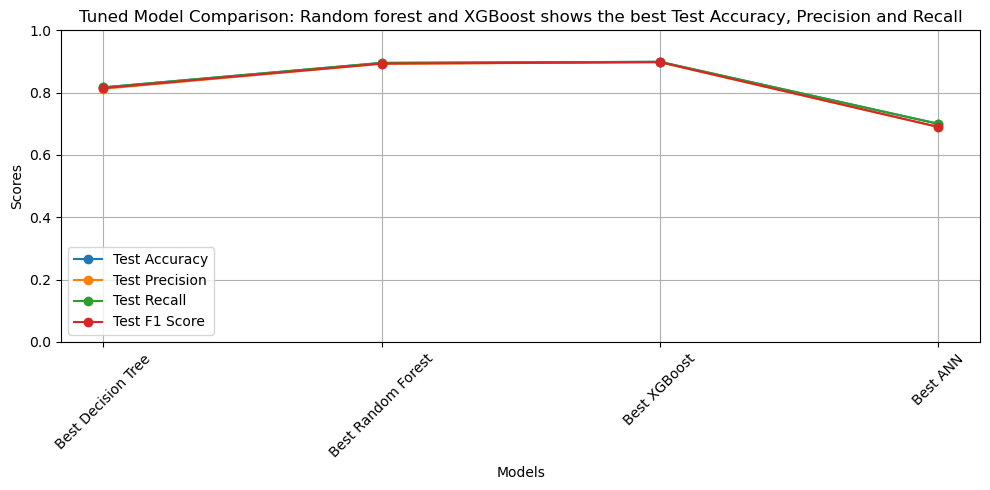

In [82]:
print("""MODEL COMPARISON
      1. Random Forest and XGBoost are the best models based on Test Accuracy, Precision and Recall.
      2. Random Forest is also a best model and is interpretable.""")
      
# Test accuracy, Test Precision and Test Recall of all the tuned models
tuned_models = ['Best Decision Tree', 'Best Random Forest', 'Best XGBoost', 'Best ANN']
tuned_test_scores = [best_dt_test_score, best_rf_test_score, best_xgb_test_score, 0.70]  # ANN test accuracy to be filled after ANN model
tuned_precisions = [
    precision_score(y_test, best_dt_model.predict(X_test), average='weighted', zero_division=0), 
    precision_score(y_test, best_rf_model.predict(X_test), average='weighted', zero_division=0), 
    precision_score(y_test_encoded, best_xgb_model.predict(X_test), average='weighted', zero_division=0), 0.69
]
tuned_recalls = [
    recall_score(y_test, best_dt_model.predict(X_test), average='weighted', zero_division=0), 
    recall_score(y_test, best_rf_model.predict(X_test), average='weighted', zero_division=0), 
    recall_score(y_test_encoded, best_xgb_model.predict(X_test), average='weighted', zero_division=0), 0.70
]
tuned_f1_scores = [
    f1_score(y_test, best_dt_model.predict(X_test), average='weighted', zero_division=0), 
    f1_score(y_test, best_rf_model.predict(X_test), average='weighted', zero_division=0), 
    f1_score(y_test_encoded, best_xgb_model.predict(X_test), average='weighted', zero_division=0), 0.69 # ANN f1 score to be filled after ANN model
]
tuned_results_df = pd.DataFrame({
    'Model': tuned_models,
    'Test Accuracy': tuned_test_scores,
    'Test Precision': tuned_precisions,
    'Test Recall': tuned_recalls,
    'Test F1 Score': tuned_f1_scores
})
tuned_results_df = tuned_results_df.set_index('Model').round(2)
print("\nTuned Model Comparison:\n")
print(tuned_results_df)

# plot the results as a line plot
plt.figure(figsize=(10, 5))
plt.plot(tuned_models, tuned_test_scores, marker='o', label='Test Accuracy')
plt.plot(tuned_models, tuned_precisions, marker='o', label='Test Precision')
plt.plot(tuned_models, tuned_recalls, marker='o', label='Test Recall')
plt.plot(tuned_models, tuned_f1_scores, marker='o', label='Test F1 Score')
plt.title('Tuned Model Comparison: Random forest and XGBoost shows the best Test Accuracy, Precision and Recall')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/Best_tuned_model_comparison.png')
plt.show()

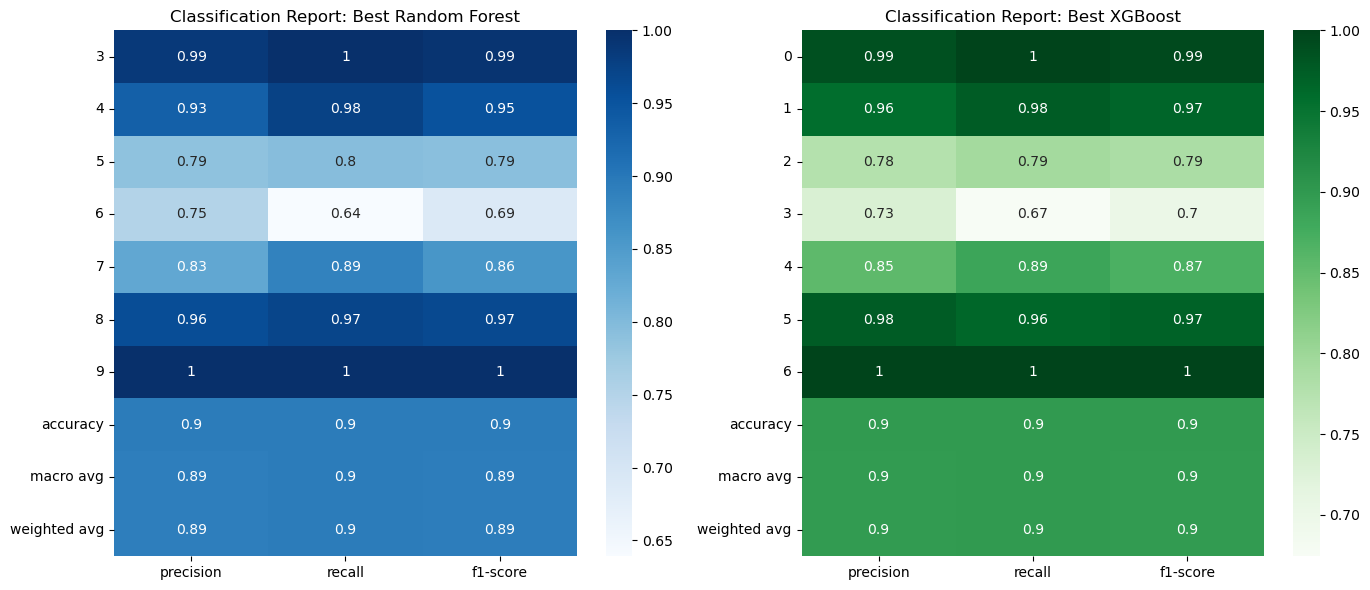

In [83]:
# CLASSIFICATION REPORT FOR BEST RANDOM FOREST AND BEST XGBOOST MODELS
from sklearn.metrics import classification_report
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Classification report for Best Random Forest
rf_y_pred = best_rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Classification Report: Best Random Forest')
# Classification report for Best XGBoost
xgb_y_pred = best_xgb_model.predict(X_test)
xgb_report = classification_report(y_test_encoded, xgb_y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(xgb_report).iloc[:-1, :].T, annot=True, cmap='Greens', ax=axes[1])
axes[1].set_title('Classification Report: Best XGBoost')
plt.tight_layout()
plt.show()

In [84]:
print("""FINDINGS""")

FINDINGS


In [85]:
print("""FINDINGS:
1. XGBoost and Random Forest have the best accuracy of 90%
2. XGBoost also has the best recall value for Class 5 and 6 although Random Forest is a very close second
3. Interpretability: Random forest models are easy to intepret and communicate
4. WILL SELECT RANDOM FOREST AS THE FINAL MODEL: Very high recall (90%) and Accuracy of 90%
""")


FINDINGS:
1. XGBoost and Random Forest have the best accuracy of 90%
2. XGBoost also has the best recall value for Class 5 and 6 although Random Forest is a very close second
3. Interpretability: Random forest models are easy to intepret and communicate
4. WILL SELECT RANDOM FOREST AS THE FINAL MODEL: Very high recall (90%) and Accuracy of 90%



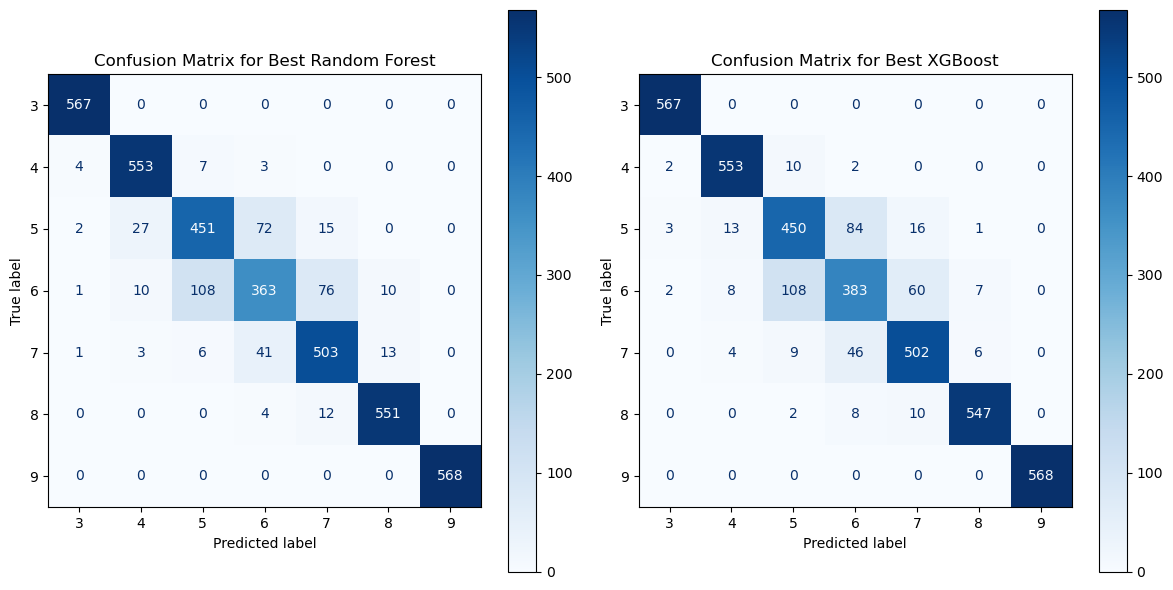

In [86]:
# FINDINGS: Random Forest is the best model for high Recall, Precision, Accuracy and Balance and ease of interpretability.

# Confusion Matrix for the best Random Forest model and XG Boost Model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

# Random Forest
y_pred_rf = best_rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot(cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for Best Random Forest')

# XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=label_encoder.classes_)
disp_xgb.plot(cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix for Best XGBoost')

plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/confusion_matrix_rf_xgb.png')
plt.show()


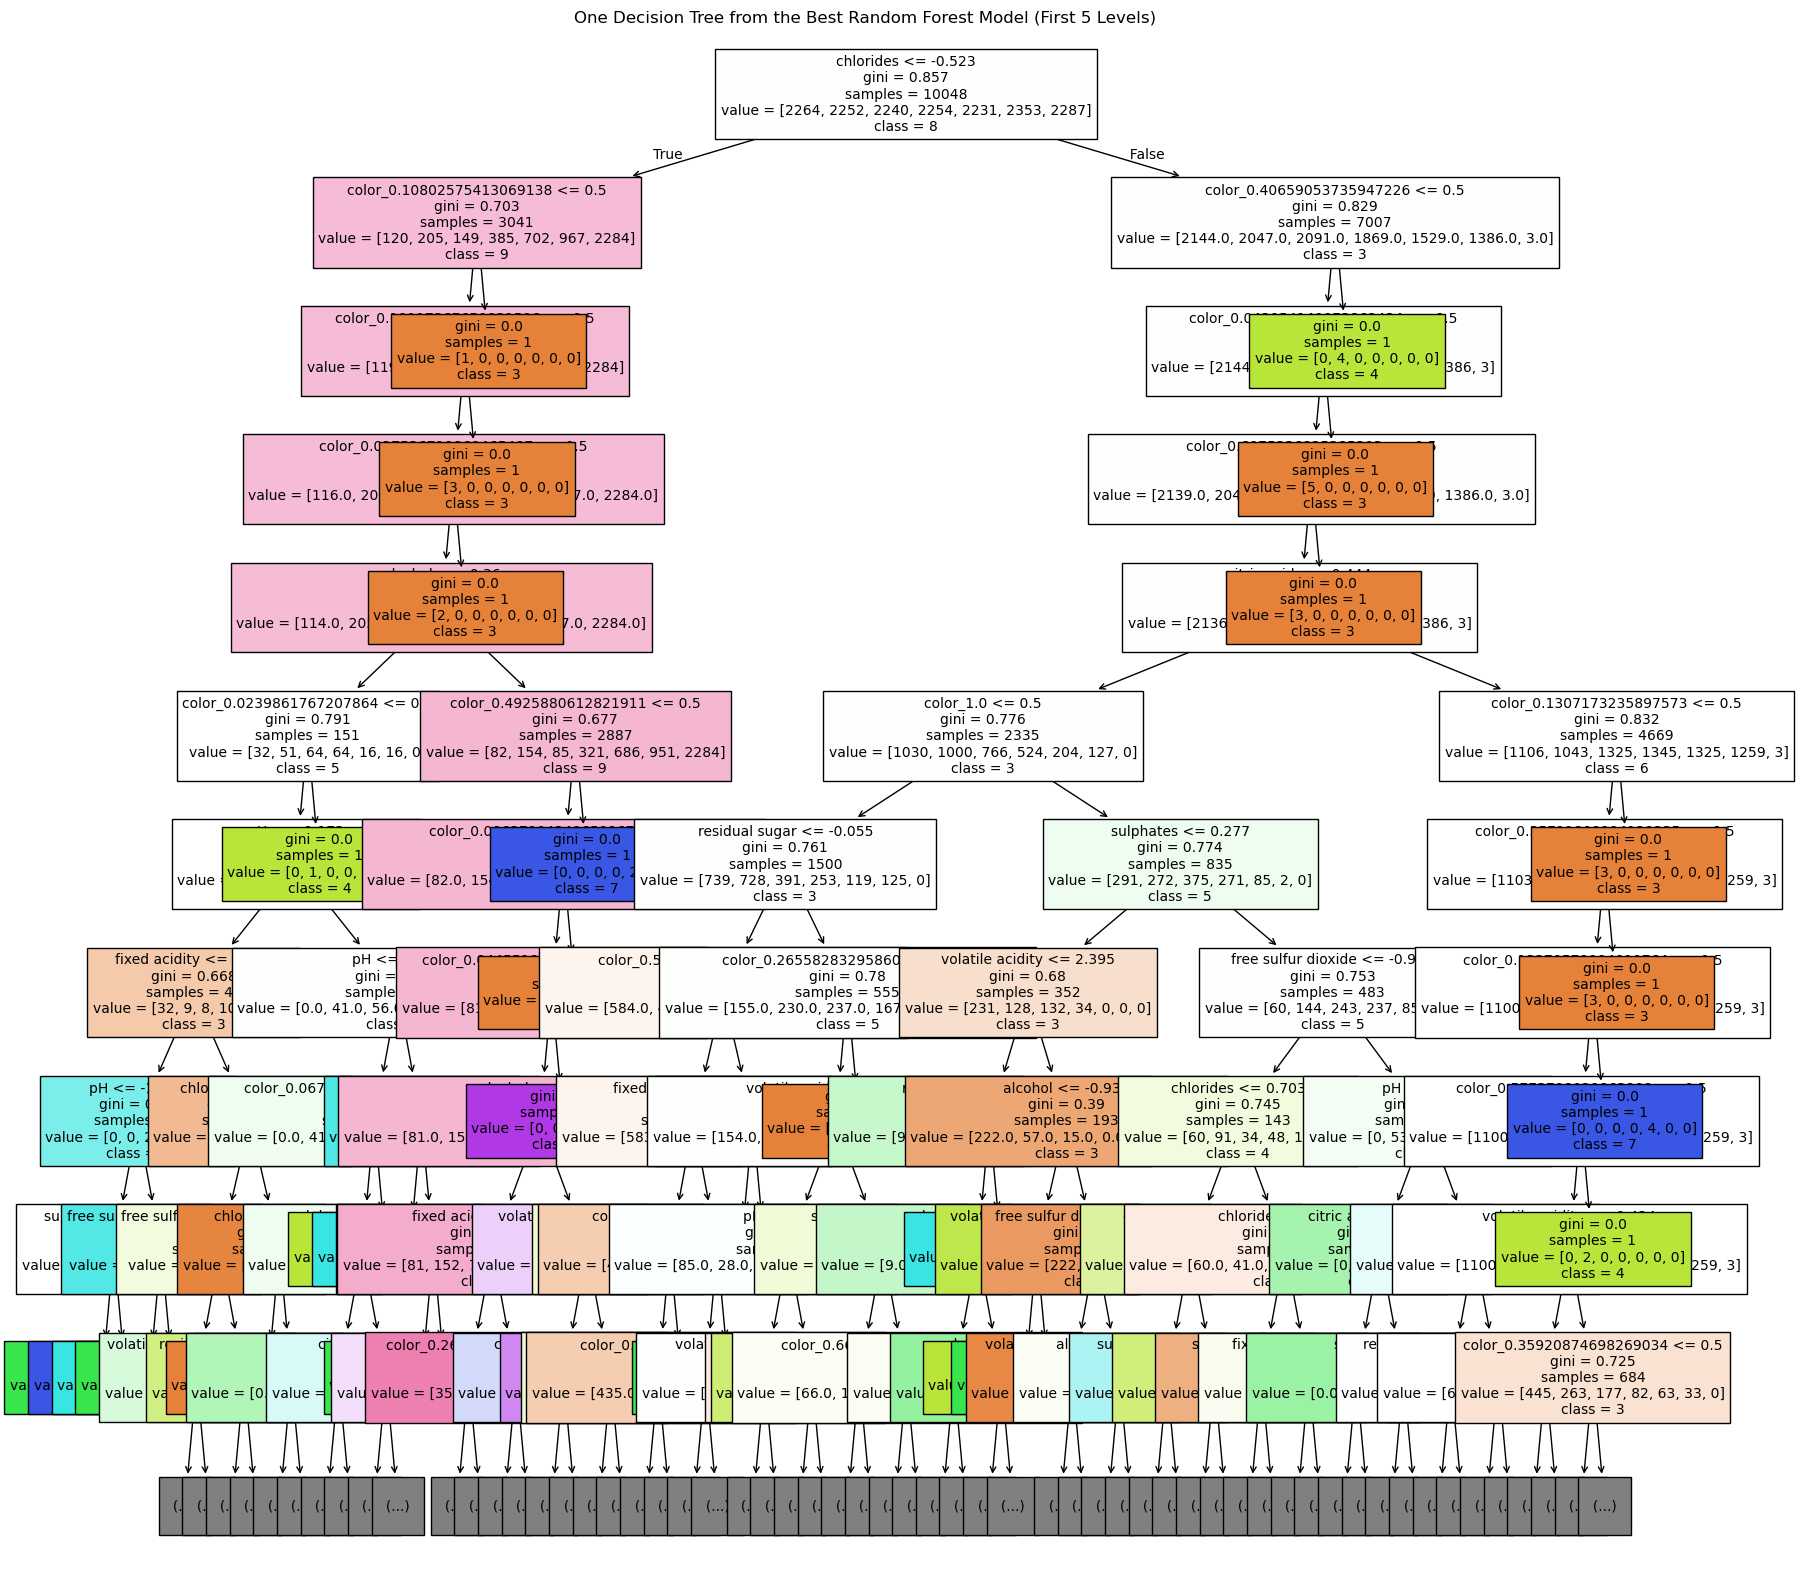

In [87]:
# Visualize One Decision Tree from the Best Random Forest model
from sklearn.tree import plot_tree
# Extract one tree from the Random Forest and show the first five levels
estimator = best_rf_model.named_steps['classifier'].estimators_[0]
plt.figure(figsize=(20, 20))
plot_tree(estimator, filled=True, feature_names=numerical_features + list(best_rf_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)), class_names=[str(cls) for cls in best_rf_model.classes_], max_depth=10, fontsize=10)
plt.title('One Decision Tree from the Best Random Forest Model (First 5 Levels)')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/one_decision_tree_rf.png')
plt.show()

In [96]:
print("""FINDINGS:
      1. Random Forest Model perform better for White Wine as compared to Red Wine with accuracy of 90% vs 84%
      2. Recall for Class 5 for Red wine (88%) is much higher as compared to White Wine (76%)
      3. Recall for Class 6 for White Wine (66%) is much higher as compared to Red Wine (57%)""")

# classification report for Red and White wines separately for the best Random Forest model
from sklearn.metrics import classification_report
for color, color_name in zip([0.0, 1.0], ['White Wine', 'Red Wine']):
    X_test_color = X_test[X_test['color'] == color]
    y_test_color = y_test[X_test['color'] == color]
    if len(X_test_color) > 0:
        y_pred_color = best_rf_model.predict(X_test_color)
        print(f"Classification Report for {color_name}:\n")
        print(classification_report(y_test_color, y_pred_color, zero_division=0))
    else:
        print(f"No samples found for {color_name} in X_test.")

FINDINGS:
      1. Random Forest Model perform better for White Wine as compared to Red Wine with accuracy of 90% vs 84%
      2. Recall for Class 5 for Red wine (88%) is much higher as compared to White Wine (76%)
      3. Recall for Class 6 for White Wine (66%) is much higher as compared to Red Wine (57%)
Classification Report for White Wine:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       279
           4       0.93      0.99      0.96       365
           5       0.78      0.76      0.77       366
           6       0.77      0.66      0.71       449
           7       0.83      0.90      0.86       450
           8       0.96      0.97      0.97       509
           9       1.00      1.00      1.00       568

    accuracy                           0.90      2986
   macro avg       0.89      0.90      0.89      2986
weighted avg       0.90      0.90      0.90      2986

Classification Report for Red Wine:

              prec

/var/folders/qh/nl8_rwhs0m5fx3p4tbcvk7840000gn/T/ipykernel_67797/2044587547.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  for i, color in zip(range(n_classes), plt.cm.get_cmap('tab10').colors):


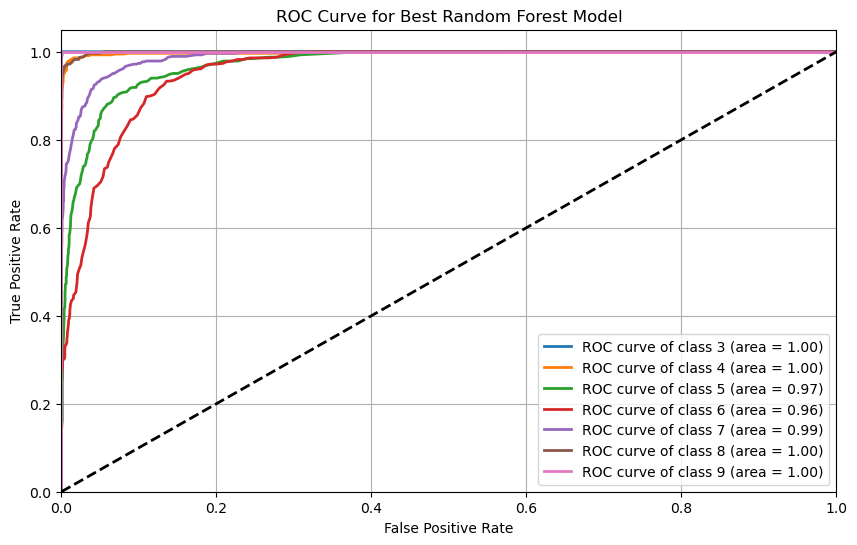

In [90]:
# Plot the ROC Curve for the best Random Forest model
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
y_prob_rf = best_rf_model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(best_rf_model.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == best_rf_model.classes_[i], y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), plt.cm.get_cmap('tab10').colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {best_rf_model.classes_[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/roc_curve_rf.png')
plt.show()

RESULT - FEATURE IMPORTANCE AND SUMMARY
      
1. Best Model: Random Forest: Balance between Recall, Precision and Accuracy
2. Best Parameters: 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200
3. Training Accuracy: 0.99
4. Testing Accuracy: 0.90
5. Testing Recall: 0.90
6. Testing Precision: 0.89

- Factors that influence the Red and White Wine Quality then most are:
      
  - "Chlorides"
  - "Free Sulfur Dioxide"
  - "Alcohol"
  - "Volatile Acidity"
  - "pH"
  - "Fixed Acidity"
  - "Citric Acid"
  - "Residual Sugar"
  - "Sulphates"
  


Feature Importances from Best Random Forest Model:



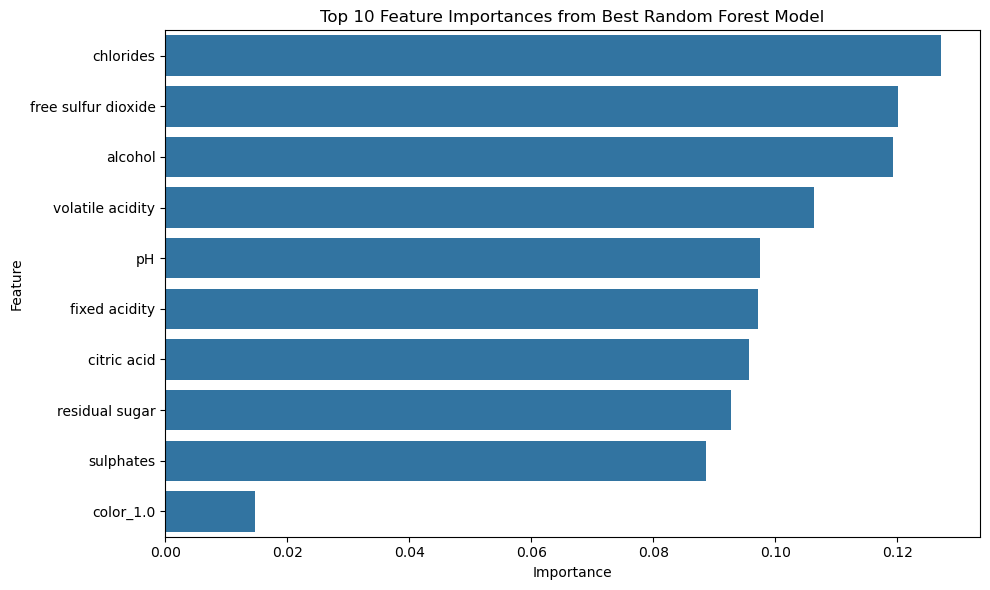

In [91]:
print("""RESULT - FEATURE IMPORTANCE AND SUMMARY
      
1. Best Model: Random Forest: Balance between Recall, Precision and Accuracy
2. Best Parameters: 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200
3. Training Accuracy: 0.99
4. Testing Accuracy: 0.90
5. Testing Recall: 0.90
6. Testing Precision: 0.89

- Factors that influence the Red and White Wine Quality then most are:
      
  - "Chlorides"
  - "Free Sulfur Dioxide"
  - "Alcohol"
  - "Volatile Acidity"
  - "pH"
  - "Fixed Acidity"
  - "Citric Acid"
  - "Residual Sugar"
  - "Sulphates"
  
""")

# Identify the Features for the Best Random Forest model
feature_names = numerical_features + list(best_rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
importances = best_rf_model.named_steps['classifier'].feature_importances_
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print("\nFeature Importances from Best Random Forest Model:\n")
# plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/feature_importances_rf.png')
plt.show()


In [92]:
print("""NEXT STEPS

    1. Identify other external factors that can influence the quality of wine like weather, soil, region etc and include them in the model.
    2. Refine the model futher using the additional features to improve the accuracy and recall to over 95%
    3. Identify various use cases where wine classification can be applied in practice.
    4. Understand the business objectives and align the model accordingly basis the use case.
    5. Understand the business objectives and align the model accordingly.
""")

NEXT STEPS

    1. Identify other external factors that can influence the quality of wine like weather, soil, region etc and include them in the model.
    2. Refine the model futher using the additional features to improve the accuracy and recall to over 95%
    3. Identify various use cases where wine classification can be applied in practice.
    4. Understand the business objectives and align the model accordingly basis the use case.
    5. Understand the business objectives and align the model accordingly.



In [93]:
print("""PRACTICAL APPLICATION AND BUSINESS VALUE OF WINE QUALITY PREDICTION MODEL
      
     1. Use of ML/AI models to classify wine into different categories (1 through 10) and at scale without relying on manual process of classifying 
        wine that’s time consuming and is left to individual choices and taste buds at times
     2. Opportunity for the makers of wine to modify and finetune the production process so that the Wine falls into desired class 
        (4,5,6 into medium category, 7,8 into high and 9 and 10 into fine wine category)
     3. From a marketeer perspective, it provides opportunity to maximize the revenue or avoid revenue leakage for wines misclassified 
        into lower grade than it actually is.
""")

PRACTICAL APPLICATION AND BUSINESS VALUE OF WINE QUALITY PREDICTION MODEL
      
     1. Use of ML/AI models to classify wine into different categories (1 through 10) and at scale without relying on manual process of classifying 
        wine that’s time consuming and is left to individual choices and taste buds at times
     2. Opportunity for the makers of wine to modify and finetune the production process so that the Wine falls into desired class 
        (4,5,6 into medium category, 7,8 into high and 9 and 10 into fine wine category)
     3. From a marketeer perspective, it provides opportunity to maximize the revenue or avoid revenue leakage for wines misclassified 
        into lower grade than it actually is.




Feature Importances from Best XGBoost Model:



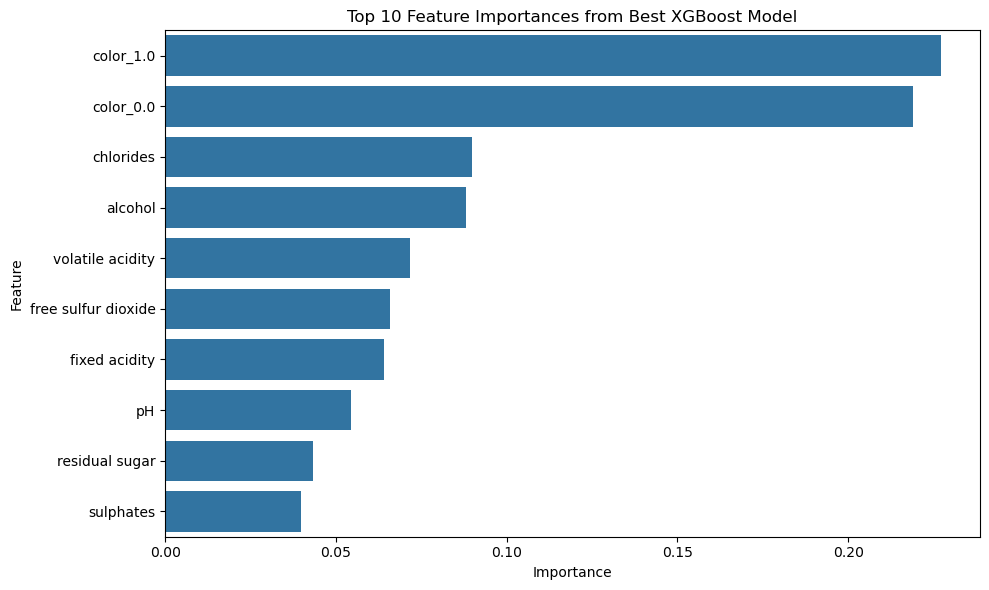

In [94]:
# Features that influence the Quality of Wine for Best XGBoost model
xgb_feature_names = numerical_features + list(best_xgb_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
xgb_importances = best_xgb_model.named_steps['classifier'].feature_importances_
xgb_feature_importances = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_importances})
xgb_feature_importances = xgb_feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print("\nFeature Importances from Best XGBoost Model:\n")
# plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importances.head(10))
plt.title('Top 10 Feature Importances from Best XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [95]:
print("""END OF REPORT""")

END OF REPORT
